# Sommaire :

**Partie 1 : <a href="#C1">Nettoyage des données**</a>  
- a) <a href="#C2">Importation et découverte du jeu de données</a>
- b) <a href="#C3">Traitement des valeurs aberrantes</a>
- c) <a href="#C4">Traitement des valeurs manquantes</a>

**Partie 2 : <a href="#C5">Analyse exploratoire des données**</a>  
- a) <a href="#C6">Analyses univariées</a>
- b) <a href="#C7">Analyses bivariées</a>
- c) <a href="#C8">Analyse multivariée</a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <a name="C1">Partie 1 : Nettoyage des données

## <a name="C2">a) Importation et découverte du jeu de données

In [12]:
df_data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')

C:\Users\bmeur\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
pd.set_option('display.max_columns', None)

In [14]:
df_data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

In [15]:
df_data.shape

(320772, 162)

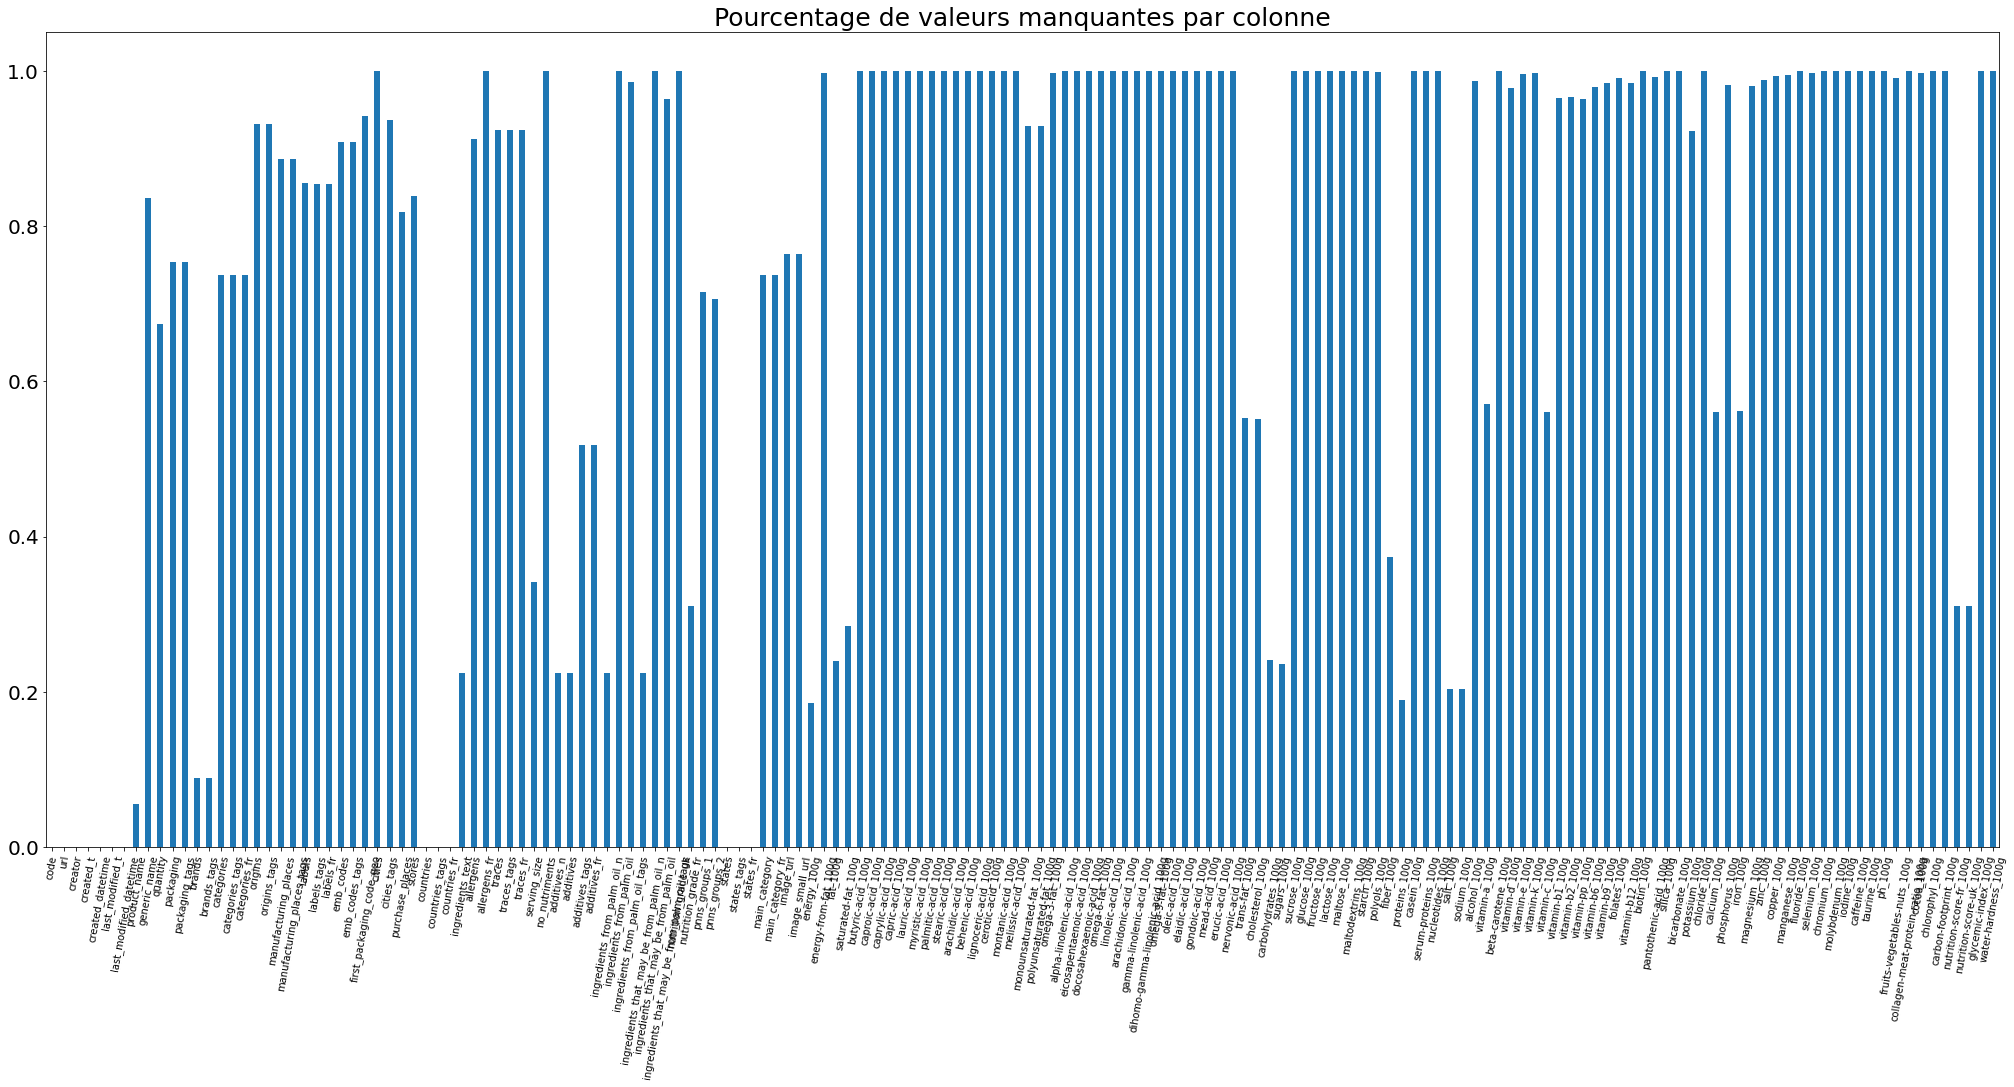

In [16]:
plt.figure(figsize = (35,15))
g=(df_data.isna().sum()/df_data.shape[0]).plot(kind='bar')
plt.xticks(rotation=80)
plt.yticks(fontsize=20)
g.set_title('Pourcentage de valeurs manquantes par colonne', fontsize=25)
plt.show()

--> Il y a beaucoup de colonnes avec quasiement 100% de valeurs manquantes.

In [17]:
(df_data.isna().sum()/df_data.shape[0])[(df_data.isna().sum()/df_data.shape[0])>0.9].count()

100

--> 100 colonnes sur les 162 (=62%) ont plus de 90% de valeurs manquantes.

### Filtre sur les produits uniquement commercialisés en France

In [18]:
df_data['countries_fr'].unique().size

723

In [19]:
df_data['countries_fr'].unique()

array(['France', 'États-Unis', 'Royaume-Uni', 'France,États-Unis',
       'Canada', 'Suisse', 'Espagne', 'Allemagne', 'Slovénie', 'Italie',
       'Roumanie', 'Australie', 'Portugal', 'France,Royaume-Uni',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'Guadeloupe', nan,
       'Royaume-Uni,États-Unis', 'Canada,États-Unis', 'Pays-Bas',
       'Australie,France', 'Canada,France,Suisse,États-Unis',
       'France,États-Unis,en:Etats-unis', 'Irlande', 'France,La Réunion',
       'Taiwan', 'Australie,Suisse', 'France,Allemagne', 'Brésil',
       'Belgique,France', 'République dominicaine',
       'États-Unis,en:Australie', 'Arabie saoudite',
       'Émirats arabes unis', 'Irak', 'Koweït', 'Moldavie', 'Belgique',
       'Nouvelle-Calédonie', 'Singapour', 'Finlande',
       'Australie,États-Unis', 'France,Suisse',
       'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis',
       'Polynésie française', 'Panama', 'Costa Rica', 'Mexique',
       'États-Unis,en:Pays-bas', 'Espagne,Royau

In [20]:
print(df_data['countries_fr'].dtype)

object


In [21]:
#On crée une liste contenant le mot 'france' pour pouvoir ensuite filtrer le dataset sur les produits commercialisés en France.

liste_pays = df_data['countries_fr'].unique()
liste_france = []

for string in liste_pays:
    if "France".lower() in str(string).lower():
        liste_france.append(string)

In [22]:
len(liste_france)

305

In [23]:
# On filtre le dataframe uniquement sur les produits commercialisés en France.

df_dataFR = df_data[df_data['countries_fr'].isin(liste_france)]

In [24]:
df_dataFR.shape

(98440, 162)

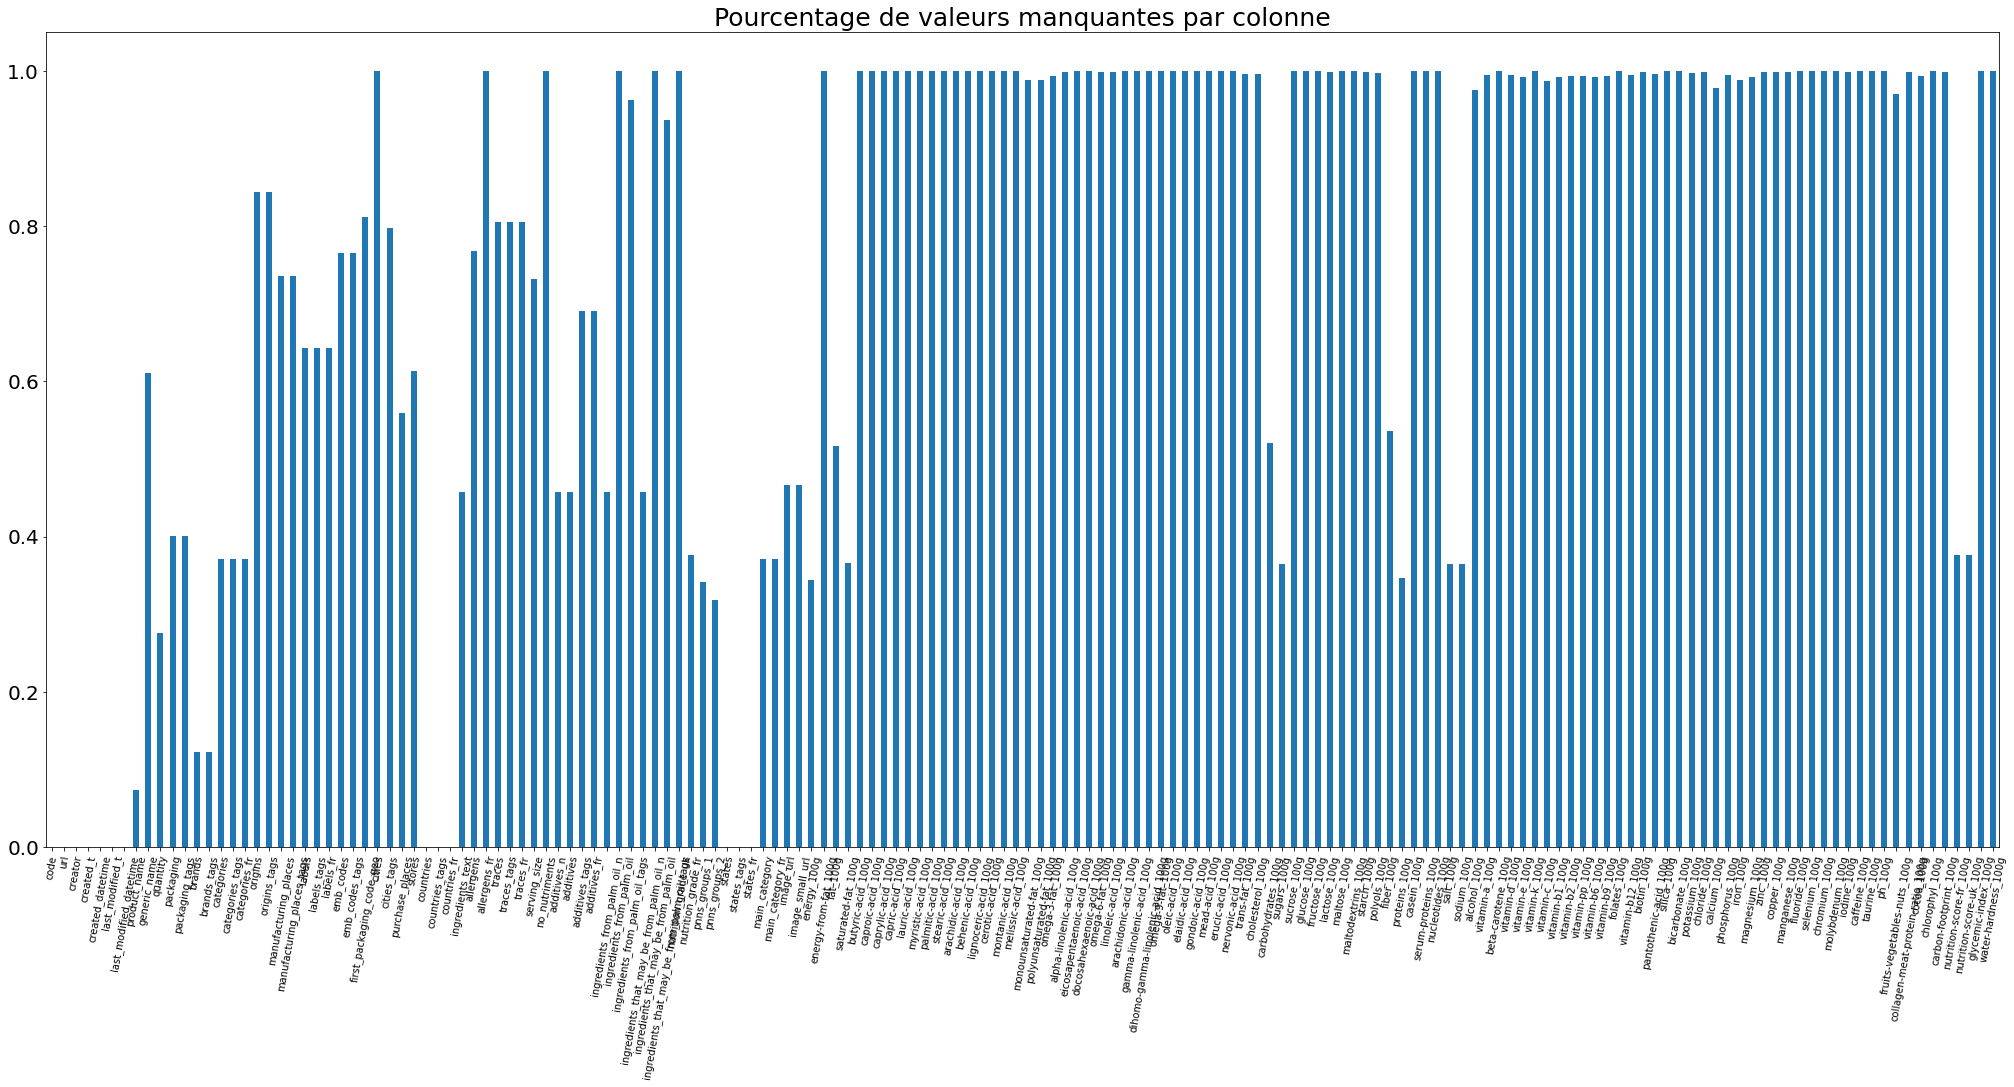

In [25]:
plt.figure(figsize = (35,15))
g=(df_dataFR.isna().sum()/df_dataFR.shape[0]).plot(kind='bar')
plt.xticks(rotation=80)
plt.yticks(fontsize=20)
g.set_title('Pourcentage de valeurs manquantes par colonne', fontsize=25)
plt.show()

--> On retrouve la même forme de graphique que pour le dataframe avec tous les pays.

### Sélection des colonnes nécessaires pour l'application avec le moins de valeurs manquantes

In [26]:
pd.set_option('display.max_rows', None)

In [27]:
# On trie les colonnes par pourcentage de valeurs manquantes.

(df_dataFR.isna().sum()/df_dataFR.shape[0]).sort_values(ascending=True)

code                                          0.000000
states_tags                                   0.000000
states                                        0.000000
countries_tags                                0.000000
states_fr                                     0.000000
last_modified_datetime                        0.000000
countries                                     0.000000
created_t                                     0.000000
creator                                       0.000000
url                                           0.000000
last_modified_t                               0.000000
countries_fr                                  0.000000
created_datetime                              0.000010
product_name                                  0.073070
brands                                        0.122044
brands_tags                                   0.122085
quantity                                      0.276341
pnns_groups_2                                 0.318996
pnns_group

In [28]:
pd.reset_option('display.max_rows')

In [29]:
serie_columns = (df_dataFR.isna().sum()/df_dataFR.shape[0]).sort_values(ascending=True)

In [30]:
df_dataFR_sorted = pd.DataFrame()

In [31]:
# On crée un dataframe avec les colonnes triées par pourcentage de valeurs manquantes pour faciliter la lecture.

for i in serie_columns.index:
    df_dataFR_sorted[i] = df_dataFR[i]

C:\Users\bmeur\AppData\Local\Temp/ipykernel_13560/874194279.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dataFR_sorted[i] = df_dataFR[i]


In [32]:
df_dataFR_sorted.head()

,code,states_tags,states,countries_tags,states_fr,last_modified_datetime,countries,created_t,creator,url,last_modified_t,countries_fr,created_datetime,product_name,brands,brands_tags,quantity,pnns_groups_2,pnns_groups_1,energy_100g,proteins_100g,salt_100g,sodium_100g,sugars_100g,saturated-fat_100g,categories,categories_tags,main_category,main_category_fr,categories_fr,nutrition-score-fr_100g,nutrition_grade_fr,nutrition-score-uk_100g,packaging,packaging_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_text,additives_n,ingredients_from_palm_oil_n,additives,image_small_url,image_url,fat_100g,carbohydrates_100g,fiber_100g,purchase_places,generic_name,stores,labels_tags,labels_fr,labels,additives_fr,additives_tags,serving_size,manufacturing_places,manufacturing_places_tags,emb_codes,emb_codes_tags,allergens,cities_tags,traces,traces_fr,traces_tags,first_packaging_code_geo,origins,origins_tags,ingredients_that_may_be_from_palm_oil_tags,ingredients_from_palm_oil_tags,fruits-vegetables-nuts_100g,alcohol_100g,calcium_100g,vitamin-c_100g,polyunsaturated-fat_100g,monounsaturated-fat_100g,iron_100g,vitamin-b1_100g,magnesium_100g,vitamin-e_100g,vitamin-b6_100g,vitamin-pp_100g,vitamin-b9_100g,cocoa_100g,omega-3-fat_100g,vitamin-b2_100g,vitamin-d_100g,vitamin-a_100g,phosphorus_100g,vitamin-b12_100g,pantothenic-acid_100g,cholesterol_100g,trans-fat_100g,potassium_100g,polyols_100g,zinc_100g,biotin_100g,alpha-linolenic-acid_100g,carbon-footprint_100g,starch_100g,collagen-meat-protein-ratio_100g,omega-6-fat_100g,linoleic-acid_100g,lactose_100g,iodine_100g,copper_100g,chloride_100g,manganese_100g,selenium_100g,vitamin-k_100g,fluoride_100g,bicarbonate_100g,ph_100g,docosahexaenoic-acid_100g,caffeine_100g,energy-from-fat_100g,silica_100g,taurine_100g,casein_100g,fructose_100g,omega-9-fat_100g,eicosapentaenoic-acid_100g,serum-proteins_100g,sucrose_100g,beta-carotene_100g,maltodextrins_100g,nucleotides_100g,oleic-acid_100g,arachidonic-acid_100g,chromium_100g,glucose_100g,maltose_100g,molybdenum_100g,folates_100g,lauric-acid_100g,montanic-acid_100g,gamma-linolenic-acid_100g,arachidic-acid_100g,chlorophyl_100g,melissic-acid_100g,erucic-acid_100g,cities,allergens_fr,no_nutriments,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,glycemic-index_100g,dihomo-gamma-linolenic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,nervonic-acid_100g,water-hardness_100g
0,3087,"en:to-be-completed,en:nutrition-facts-to-be-co...","en:to-be-completed, en:nutrition-facts-to-be-c...",en:france,"A compléter,Informations nutritionnelles à com...",2016-09-17T09:18:13Z,en:FR,1474103866,openfoodfacts-contributors,http://world-fr.openfoodfacts.org/produit/0000...,1474103893,France,2016-09-17T09:17:46Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,1kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,"en:to-be-completed,en:nutrition-facts-to-be-co...","en:to-be-completed, en:nutrition-facts-to-be-c...",en:france,"A compléter,Informations nutritionnelles à com...",2015-06-17T10:11:54Z,France,1434530704,date-limite-app,http://world-fr.openfoodfacts.org/produit/0000...,1434535914,France,2015-06-17T08:45:04Z,Filet de bœuf,NaN,NaN,2.46 kg,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,fr:fil

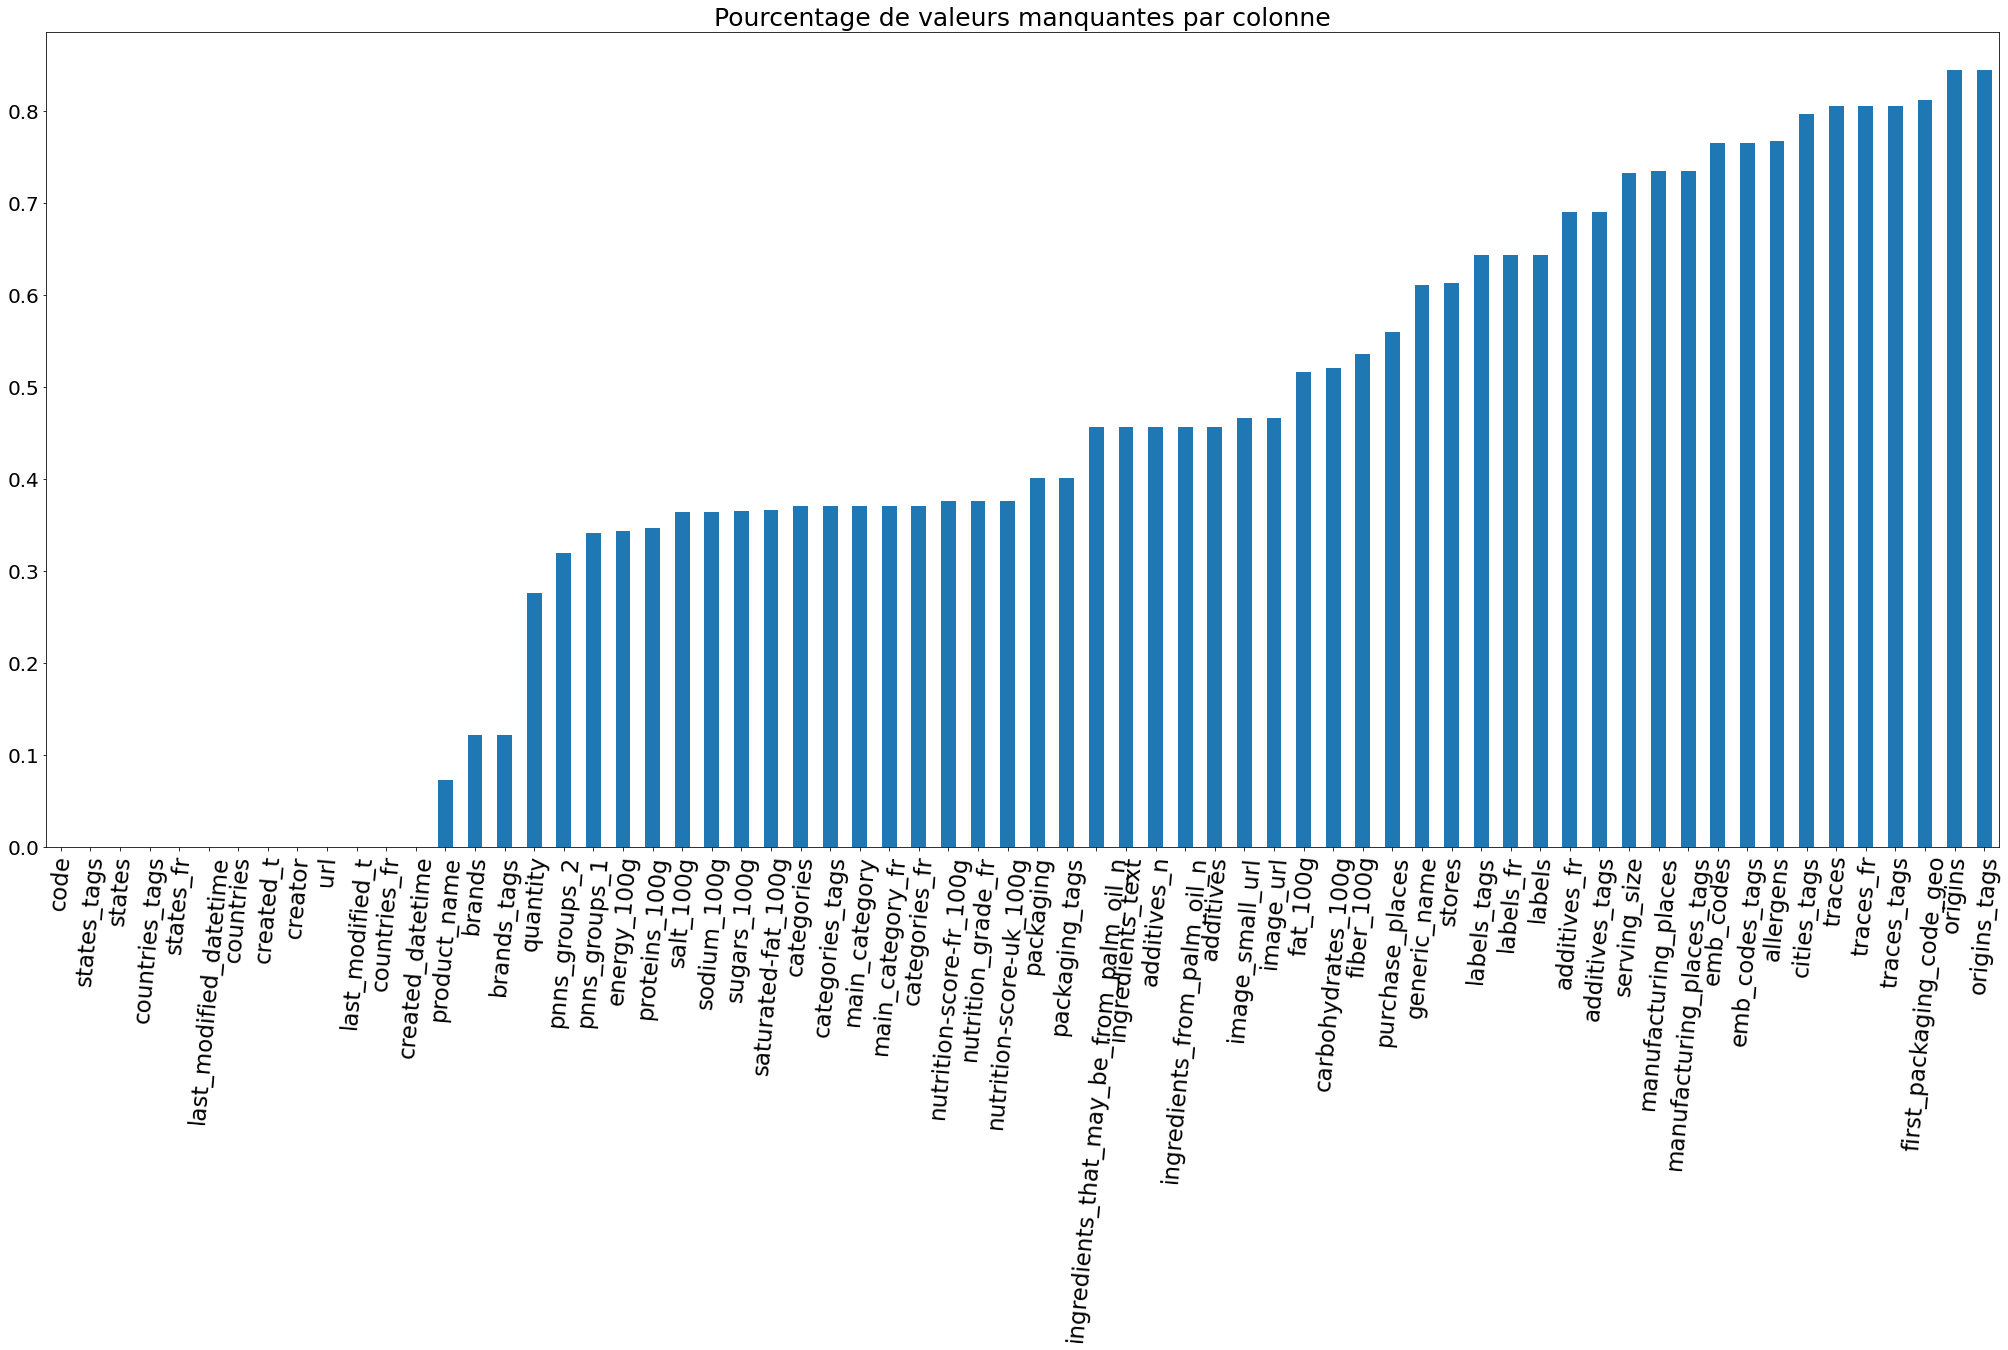

In [33]:
# On crée un nouveau graphique de pourcentage de valeurs manquantes par colonne en filtrant sur les colonnes ayant un 
# pourcentage de valeurs manquantes inférieur à 85%.

plt.figure(figsize = (35,15))
g=(df_dataFR_sorted.loc[:,'code':'origins_tags'].isna().sum()/df_dataFR_sorted.loc[:,'code':'origins_tags'].shape[0]).plot(kind='bar')
plt.xticks(rotation=85, fontsize=23)
plt.yticks(fontsize=20)
g.set_title('Pourcentage de valeurs manquantes par colonne', fontsize=25)
plt.show()

Colonnes intéressantes à analyser pour la suite :  
- countries_fr
- product_name
- brands
- quantity
- pnns_groups_2
- pnns_groups_1
- energy_100g
- proteins_100g
- salt_100g
- sodium_100g
- sugars_100g
- saturated-fat_100g
- categories_fr
- main_category_fr
- nutrition-score-fr_100g
- nutrition_grade_fr
- packaging
- ingredients_that_may_be_from_palm_oil_n
- additives_n
- ingredients_from_palm_oil_n
- fat_100g
- carbohydrates_100g
- fiber_100g
- generic_name
- labels_fr
- additives_fr
- serving_size
- manufacturing_places
- origins

In [34]:
df_dataFR_final = df_dataFR.loc[:,['countries_fr','product_name','brands','quantity','pnns_groups_2','pnns_groups_1',
                                   'energy_100g','proteins_100g','salt_100g','sodium_100g','sugars_100g','saturated-fat_100g',
                                   'categories_fr','main_category_fr','nutrition-score-fr_100g','nutrition_grade_fr',
                                   'packaging','ingredients_that_may_be_from_palm_oil_n','additives_n',
                                   'ingredients_from_palm_oil_n','fat_100g','carbohydrates_100g','fiber_100g','generic_name',
                                   'labels_fr','additives_fr','serving_size','manufacturing_places','origins']]

<AxesSubplot:>

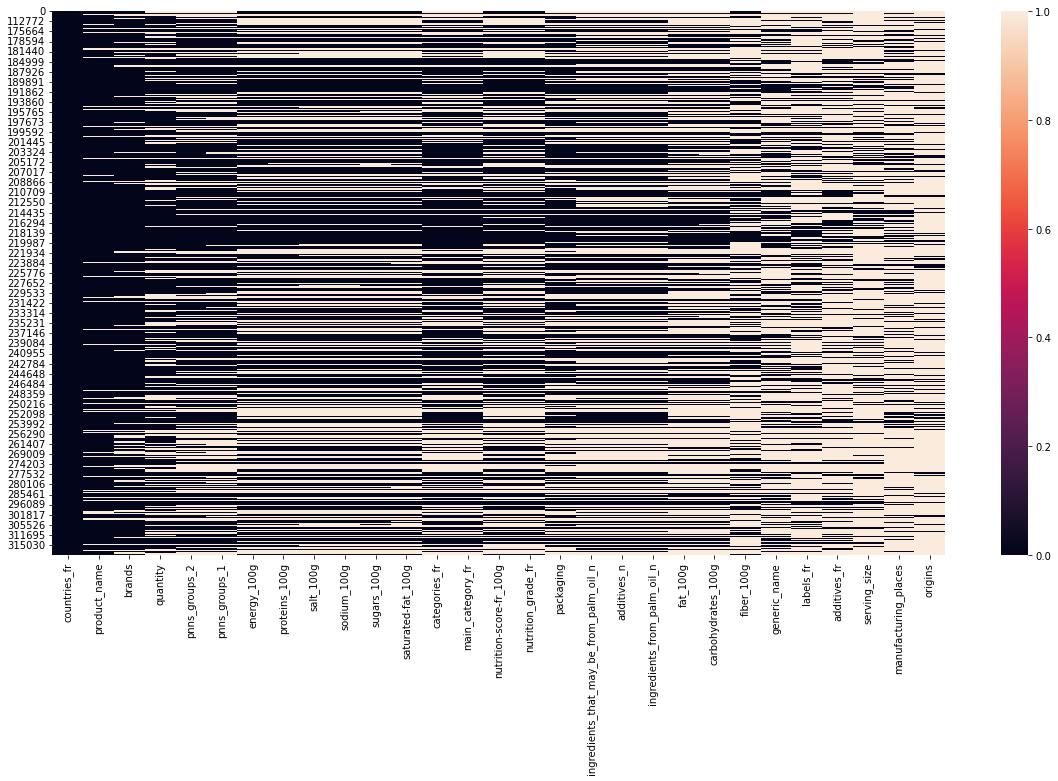

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df_dataFR_final.isna())

In [36]:
df_dataFR_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98440 entries, 0 to 320770
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   countries_fr                             98440 non-null  object 
 1   product_name                             91247 non-null  object 
 2   brands                                   86426 non-null  object 
 3   quantity                                 71237 non-null  object 
 4   pnns_groups_2                            67038 non-null  object 
 5   pnns_groups_1                            64881 non-null  object 
 6   energy_100g                              64593 non-null  float64
 7   proteins_100g                            64318 non-null  float64
 8   salt_100g                                62574 non-null  float64
 9   sodium_100g                              62571 non-null  float64
 10  sugars_100g                              6251

## <a name="C3">b) Traitement des valeurs aberrantes

In [37]:
df_dataFR_final.describe()

,energy_100g,proteins_100g,salt_100g,sodium_100g,sugars_100g,saturated-fat_100g,nutrition-score-fr_100g,ingredients_that_may_be_from_palm_oil_n,additives_n,ingredients_from_palm_oil_n,fat_100g,carbohydrates_100g,fiber_100g
count,6.459300e+04,64318.000000,62574.000000,62571.000000,62515.000000,62375.000000,61415.000000,53466.000000,53466.000000,53466.000000,47642.000000,47211.000000,45723.000000
mean,1.171553e+03,7.754531,1.160535,0.456924,13.432792,5.423696,8.683204,0.148281,1.856619,0.069839,13.332232,27.759277,2.559271
std,1.283590e+04,7.887373,4.309815,1.696759,19.087618,8.531083,9.046131,0.450784,2.561405,0.258593,16.926708,27.413340,4.634788
min,0.000000e+00,0.000000,0.000000,0.000000,-0.100000,0.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.270000e+02,1.800000,0.080000,0.031496,1.000000,0.300000,1.000000,0.000000,0.000000,0.000000,1.300000,4.000000,0.000000
50%,1.035000e+03,6.000000,0.558800,0.220000,4.100000,2.000000,9.000000,0.000000,1.000000,0.000000,6.800000,14.500000,1.380000
75%,1.649000e+03,11.000000,1.244600,0.490000,17.800000,7.400000,15.000000,0.000000,3.000000,0.000000,21.000000,53.000000,3.200000
max,3.251373e+06,100.000000,211.000000,83.000000,105.000000,210.000000,40.000000,5.000000,31.000000,2.000000,380.000000,190.000000,178.000000


In [38]:
# On filtre le dataframe sur uniquement les produits qui ont un 'product_name'.

df_dataFR_final = df_dataFR_final[df_dataFR_final['product_name'].notna()]

In [39]:
# On crée une colonne sommant les colonnes suivantes : proteins_100g, salt_100g, fat_100g, carbohydrates_100g et fiber_100g.
# Le but étant ensuite de supprimer les produits ayant un total supérieur à 105g (pour laisser une marge d'erreur).

df_dataFR_final['Somme nutriments_100g'] = df_dataFR_final.loc[:,['proteins_100g', 'salt_100g', 'fat_100g', 'carbohydrates_100g', 
                                                                  'fiber_100g']].sum(axis='columns')

In [40]:
df_dataFR_final = df_dataFR_final[df_dataFR_final['Somme nutriments_100g']<=105]

On conserve maintenant uniquement les colonnes qui seront nécessaires au développement de l'application :
- product_name
- brands
- pnns_groups_2
- pnns_groups_1
- energy_100g
- salt_100g
- sugars_100g
- saturated-fat_100g
- nutrition-score-fr_100g
- nutrition_grade_fr
- fiber_100g
- serving_size

In [41]:
df_dataFR_final = df_dataFR_final.loc[:,['product_name', 'brands', 'pnns_groups_2', 'pnns_groups_1', 'energy_100g',
                                          'salt_100g', 'sugars_100g', 'saturated-fat_100g', 'nutrition-score-fr_100g',
                                          'nutrition_grade_fr', 'fiber_100g', 'serving_size']]

In [42]:
df_dataFR_final.describe()

,energy_100g,salt_100g,sugars_100g,saturated-fat_100g,nutrition-score-fr_100g,fiber_100g
count,6.408000e+04,62080.000000,62020.00000,61887.000000,60942.000000,45374.000000
mean,1.169037e+03,1.143273,13.39914,5.403125,8.670785,2.503328
std,1.288394e+04,4.105698,19.06220,8.455767,9.036585,4.259699
min,0.000000e+00,0.000000,-0.10000,0.000000,-15.000000,0.000000
25%,4.270000e+02,0.080000,1.00000,0.300000,1.000000,0.000000
50%,1.033000e+03,0.558800,4.00000,1.950000,9.000000,1.300000
75%,1.648000e+03,1.244600,17.60000,7.400000,15.000000,3.200000
max,3.251373e+06,100.000000,105.00000,100.000000,40.000000,100.000000


In [43]:
# On remplace par NaN les valeurs de la colonne 'energy_100g' qui sont supérieurs à 3 770 kJ (valeur énergétique maximum d'un aliment)

df_dataFR_final['energy_100g'].replace(to_replace=df_dataFR_final[df_dataFR_final['energy_100g']>3770]['energy_100g'].unique(), 
                                       value=np.nan, inplace=True)

In [44]:
df_dataFR_final[df_dataFR_final['energy_100g']>3770].shape

(0, 12)

In [45]:
# On remplace par NaN les valeurs de la colonne 'sugars_100g' qui sont inférieurs à 0 ou supérieurs à 100%.

df_dataFR_final['sugars_100g'].replace(to_replace=df_dataFR_final[(df_dataFR_final['sugars_100g']<0) | 
                                                                  (df_dataFR_final['sugars_100g']>100)]['sugars_100g'].unique(), 
                                       value=np.nan, inplace=True)

In [46]:
df_dataFR_final[(df_dataFR_final['sugars_100g']<0) | (df_dataFR_final['sugars_100g']>100)].shape

(0, 12)

In [47]:
df_dataFR_final['pnns_groups_1'].unique()

array([nan, 'unknown', 'Cereals and potatoes', 'Sugary snacks',
       'Beverages', 'Fish Meat Eggs', 'Composite foods',
       'Fruits and vegetables', 'Milk and dairy products', 'Salty snacks',
       'Fat and sauces', 'fruits-and-vegetables', 'sugary-snacks',
       'cereals-and-potatoes'], dtype=object)

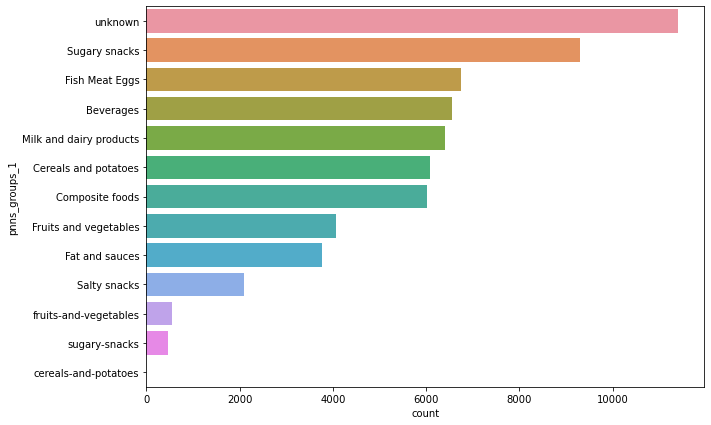

In [48]:
plt.figure(figsize = (10,7))
pnns_g1_order = df_dataFR_final['pnns_groups_1'].value_counts().index
sns.countplot(data=df_dataFR_final, y=df_dataFR_final['pnns_groups_1'], order=pnns_g1_order)
plt.show()

In [49]:
# On homogénéise le nom des pnns_groups_1 et on remplace les 'unknown' par NaN.

df_dataFR_final['pnns_groups_1'] = df_dataFR_final['pnns_groups_1'].replace(['fruits-and-vegetables', 'sugary-snacks', 
                                                                             'cereals-and-potatoes', 'unknown'],
                                                                            ['Fruits and vegetables', 'Sugary snacks', 
                                                                            'Cereals and potatoes', np.nan])

In [50]:
df_dataFR_final['pnns_groups_2'].unique()

array([nan, 'unknown', 'Legumes', 'Biscuits and cakes',
       'Non-sugared beverages', 'Sweetened beverages', 'Meat',
       'One-dish meals', 'Soups', 'Chocolate products', 'Cheese',
       'Sweets', 'Sandwich', 'Appetizers', 'Dressings and sauces',
       'Dried fruits', 'Nuts', 'Breakfast cereals',
       'Pizza pies and quiche', 'Fruits', 'Fruit juices', 'Fats',
       'Alcoholic beverages', 'Cereals', 'Vegetables', 'Bread',
       'Processed meat', 'vegetables', 'Ice cream', 'Fish and seafood',
       'pastries', 'Milk and yogurt', 'Dairy desserts', 'Tripe dishes',
       'Artificially sweetened beverages', 'Fruit nectars', 'Potatoes',
       'Eggs', 'Salty and fatty products', 'fruits', 'legumes', 'cereals'],
      dtype=object)

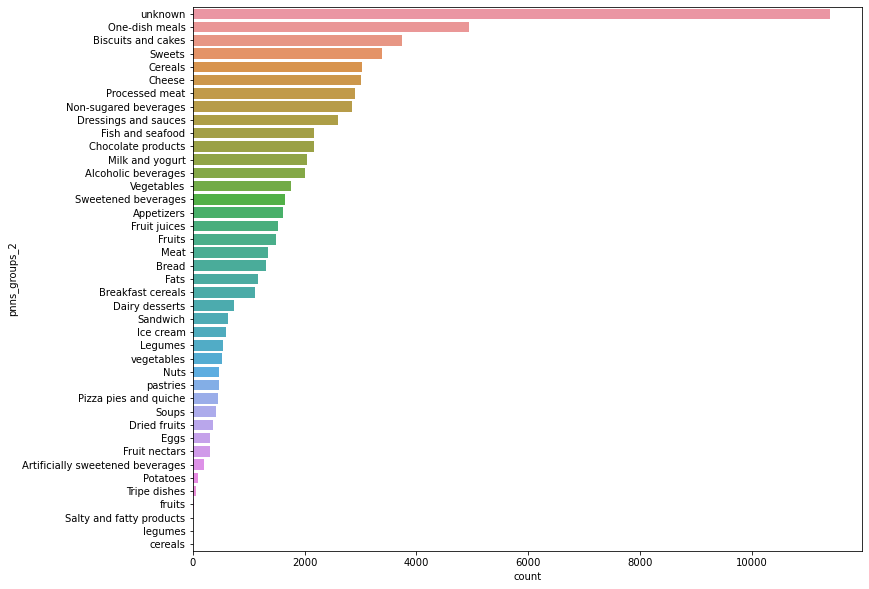

In [51]:
plt.figure(figsize = (12,10))
pnns_g2_order = df_dataFR_final['pnns_groups_2'].value_counts().index
sns.countplot(data=df_dataFR_final, y=df_dataFR_final['pnns_groups_2'], order=pnns_g2_order)
plt.show()

In [52]:
# On homogénéise le nom des pnns_groups_2 et on remplace les 'unknown' par NaN.

df_dataFR_final['pnns_groups_2'] = df_dataFR_final['pnns_groups_2'].replace(['fruits', 'vegetables', 'legumes', 'cereals',
                                                                            'unknown'],
                                                                            ['Fruits', 'Vegetables', 'Legumes', 'Cereals',
                                                                            np.nan])

In [53]:
# On vérifie que le nutrition_grade_fr va bien de 'a' à 'e'.

df_dataFR_final['nutrition_grade_fr'].unique()

array([nan, 'e', 'd', 'c', 'a', 'b'], dtype=object)

In [54]:
# On convertit la colonne nutrition_grade_fr en catégorie.

df_dataFR_final['nutrition_grade_fr'] = df_dataFR_final['nutrition_grade_fr'].astype('category')

## <a name="C4">c) Traitement des valeurs manquantes

In [55]:
# On vérifie s'il y a des lignes dupliquées.

df_dataFR_final.duplicated().sum()

1092

In [56]:
# On supprime les lignes en doublon.

df_dataFR_final.drop_duplicates(inplace=True)

In [57]:
# Pourcentage de valeurs manquantes par colonne.

df_dataFR_final.isna().sum()/df_dataFR_final.shape[0]

product_name               0.000000
brands                     0.059558
pnns_groups_2              0.404075
pnns_groups_1              0.426683
energy_100g                0.292658
salt_100g                  0.313832
sugars_100g                0.314510
saturated-fat_100g         0.315954
nutrition-score-fr_100g    0.326420
nutrition_grade_fr         0.326420
fiber_100g                 0.497784
serving_size               0.711508
dtype: float64

In [58]:
# Pour les colonnes 'brands' et 'serving_size', on remplace les valeurs manquantes par 'unknown'.

# Pour la colonne 'serving_size', cela signifiera dans le cadre de l'application que lorsqu'il y a la valeur 'unknown', cela
# sera à l'utilisateur de renseigner lui-même la quantité consommée pour le calcul des indicateurs ensuite.

df_dataFR_final['brands'] = df_dataFR_final['brands'].replace([np.nan], ['unknown'])
df_dataFR_final['serving_size'] = df_dataFR_final['serving_size'].replace([np.nan], ['unknown'])

In [59]:
# On fait une copie du dataframe qui sera utilisé pour l'analyse exploratoire.

df_dataFR_analyse = df_dataFR_final.copy()

In [60]:
# On crée une colonne additionnelle pour calculer le remplissage des lignes sur les indicateurs ci-dessous :
# 'energy_100g', 'salt_100g', 'saturated-fat_100g', 'fiber_100g'

df_dataFR_final['Taux de remplissage indicateurs'] = df_dataFR_final.loc[:,['energy_100g', 'salt_100g', 'sugars_100g', 
                                                                            'saturated-fat_100g', 'fiber_100g']].count(axis='columns')/5

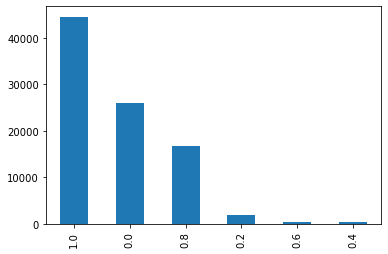

In [61]:
df_dataFR_final["Taux de remplissage indicateurs"].value_counts().plot(kind='bar')
plt.show()

In [62]:
df_dataFR_final["Taux de remplissage indicateurs"].value_counts()

1.0    44563
0.0    26039
0.8    16831
0.2     1812
0.6      429
0.4      339
Name: Taux de remplissage indicateurs, dtype: int64

--> On part de l'hypothèse que les produits avec au moins 2 des indicateurs cités ci-dessus manquants ne seront pas conservés pour la suite. Donc on filtre le dataframe sur les produits avec un 'taux de remplissage indicateurs' supérieur ou égale à 0,8.

In [63]:
df_dataFR_final = df_dataFR_final[df_dataFR_final["Taux de remplissage indicateurs"]>=0.8]

In [64]:
df_dataFR_final.isna().sum()/df_dataFR_final.shape[0]

product_name                       0.000000
brands                             0.000000
pnns_groups_2                      0.345408
pnns_groups_1                      0.346923
energy_100g                        0.001645
salt_100g                          0.002622
sugars_100g                        0.001238
saturated-fat_100g                 0.002231
nutrition-score-fr_100g            0.013812
nutrition_grade_fr                 0.013812
fiber_100g                         0.266410
serving_size                       0.000000
Taux de remplissage indicateurs    0.000000
dtype: float64

In [65]:
# On va utiliser un KNeighborsClassifier pour remplir les données manquantes de la colonne 'pnns_groups_1'.

df_dataFR_final['pnns_groups_1'].unique()

array([nan, 'Beverages', 'Sugary snacks', 'Composite foods',
       'Fruits and vegetables', 'Milk and dairy products',
       'Fat and sauces', 'Salty snacks', 'Cereals and potatoes',
       'Fish Meat Eggs'], dtype=object)

In [66]:
pnns_g1 = ['Cereals and potatoes', 'Sugary snacks', 'Beverages', 'Fish Meat Eggs', 'Composite foods', 'Fruits and vegetables'
          , 'Milk and dairy products', 'Salty snacks', 'Fat and sauces']

In [67]:
df_model_pnnsg1 = df_dataFR_final[(df_dataFR_final['pnns_groups_1'].isin(pnns_g1))&
                                  (df_dataFR_final['Taux de remplissage indicateurs']==1)]

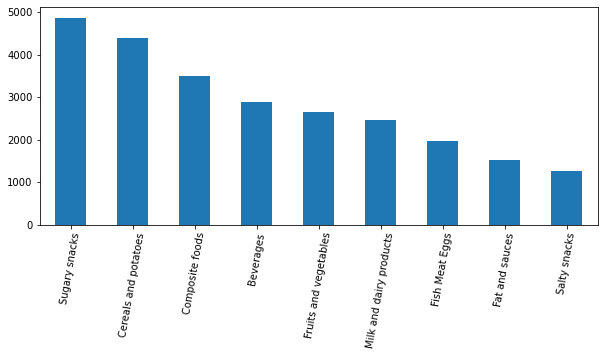

In [68]:
plt.figure(figsize = (10,4))
g = df_model_pnnsg1["pnns_groups_1"].value_counts().plot(kind='bar')
g.set_xticklabels(g.get_xticklabels(),rotation = 80)
plt.show()

In [69]:
X = df_model_pnnsg1[['energy_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g', 'fiber_100g']]
y = df_model_pnnsg1[['pnns_groups_1']]

In [70]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, stratify=y)

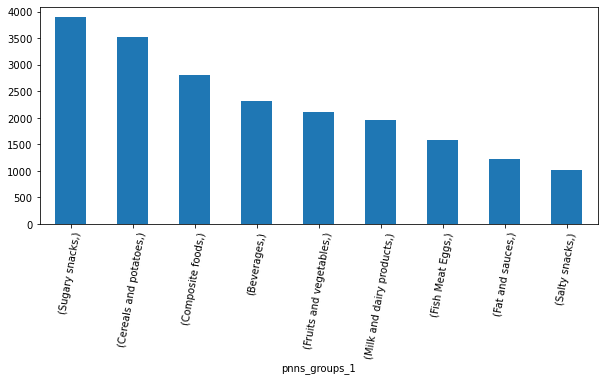

In [71]:
plt.figure(figsize = (10,4))
g = ytrain.value_counts().plot(kind='bar')
g.set_xticklabels(g.get_xticklabels(),rotation = 80)
plt.show()

In [72]:
# Dans un premier temps, on ne normalise pas les variables contenues dans X.

In [73]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
ytrain_transformed = encoder.fit_transform(ytrain)
ytest_transformed = encoder.transform(ytest)

In [74]:
from sklearn import neighbors

# On prend pour démarrer k=5.
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain, ytrain_transformed)

KNeighborsClassifier()

In [75]:
knn.score(Xtest, ytest_transformed)

0.7214942303931156

In [76]:
# On essaie maintenant d'améliorer les paramètres du k-NN en utilisant GridSearchCV

params = {
    'n_neighbors' : range(1,20),
    'weights' : ['uniform', 'distance']
}

In [77]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid=params, cv=4)

grid.fit(Xtrain, ytrain_transformed)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

In [78]:
grid.best_score_

0.7613925288480343

In [79]:
grid.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [80]:
grid.best_estimator_.score(Xtest, ytest_transformed)

0.7594367299041659

--> On peut voir qu'en prenant k=1, on augmente la précision du k-NN en passant de 72% à 76%.

In [81]:
# Vérifions maintenant l'impact d'une normalisation des variables contenues dans X.

In [82]:
from sklearn.preprocessing import RobustScaler

x_encoder = RobustScaler()
Xtrain_transformed = x_encoder.fit_transform(Xtrain)
Xtest_transformed = x_encoder.transform(Xtest)

In [83]:
# On réutilise le knn avec k=5.

knn.fit(Xtrain_transformed, ytrain_transformed)

KNeighborsClassifier()

In [84]:
knn.score(Xtest_transformed, ytest_transformed)

0.8226090357911207

--> On peut voir que l'on augmente la précision en passant à 82%.

In [85]:
# Essayons maintenant de trouver les meilleurs paramètres du k-NN en réutilisant GridSearchCV

grid.fit(Xtrain_transformed, ytrain_transformed)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

In [86]:
grid.best_score_

0.8342460395071386

In [87]:
grid.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [88]:
grid.best_estimator_.score(Xtest_transformed, ytest_transformed)

0.838451007236456

--> En prenant k=5 et weights='distance' on augmente encore la précision en passant à 84%.

In [89]:
# Avant d'appliquer ce k-NN (k=5, weights='distance') aux valeurs manquantes de 'pnns_groups_1', on va compléter les valeurs
# manquantes de 'energy_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g' et 'fiber_100g' en appliquant un KNNImputer.

df_dataFR_final_KNN = df_dataFR_final

In [90]:
from sklearn.impute import KNNImputer

df_knn_imput = df_dataFR_final_KNN[df_dataFR_final_KNN['Taux de remplissage indicateurs']==0.8][['energy_100g', 'salt_100g', 'sugars_100g',
                                                                                 'saturated-fat_100g', 'fiber_100g']]

In [91]:
df_knn_imput.isna().sum()

energy_100g             101
salt_100g               161
sugars_100g              76
saturated-fat_100g      137
fiber_100g            16356
dtype: int64

In [92]:
column_names = df_knn_imput.columns
df_index = df_knn_imput.index

In [93]:
imputer = KNNImputer()
df_knn_imput = imputer.fit_transform(df_knn_imput)

In [94]:
df_knn_imput = pd.DataFrame(data=df_knn_imput, columns=column_names, index=df_index)

In [95]:
df_knn_imput

,energy_100g,salt_100g,sugars_100g,saturated-fat_100g,fiber_100g
240,177.0,0.1000,10.4,0.0,0.88
9890,1632.0,0.0000,70.3,0.9,0.40
11300,2549.0,0.8000,4.9,4.0,3.84
11303,2577.0,0.8000,4.9,4.0,3.84
11327,2444.0,1.3000,7.8,5.6,0.08
...,...,...,...,...,...
320605,1066.0,4.6000,31.0,2.1,1.78
320608,582.0,7.3787,16.8,0.7,1.58
320613,547.0,6.7000,16.0,0.6,0.08
320625,119.0,0.0100,7.0,0.0,4.26


In [96]:
df_knn_imput.isna().sum()

energy_100g           0
salt_100g             0
sugars_100g           0
saturated-fat_100g    0
fiber_100g            0
dtype: int64

In [97]:
df_dataFR_final_KNN.loc[df_index, column_names] = df_knn_imput.loc[df_index, column_names]

In [98]:
df_dataFR_final_KNN.loc[df_index, column_names]

,energy_100g,salt_100g,sugars_100g,saturated-fat_100g,fiber_100g
240,177.0,0.1000,10.4,0.0,0.88
9890,1632.0,0.0000,70.3,0.9,0.40
11300,2549.0,0.8000,4.9,4.0,3.84
11303,2577.0,0.8000,4.9,4.0,3.84
11327,2444.0,1.3000,7.8,5.6,0.08
...,...,...,...,...,...
320605,1066.0,4.6000,31.0,2.1,1.78
320608,582.0,7.3787,16.8,0.7,1.58
320613,547.0,6.7000,16.0,0.6,0.08
320625,119.0,0.0100,7.0,0.0,4.26


In [99]:
df_dataFR_final_KNN.isna().sum()

product_name                           0
brands                                 0
pnns_groups_2                      21206
pnns_groups_1                      21299
energy_100g                            0
salt_100g                              0
sugars_100g                            0
saturated-fat_100g                     0
nutrition-score-fr_100g              848
nutrition_grade_fr                   848
fiber_100g                             0
serving_size                           0
Taux de remplissage indicateurs        0
dtype: int64

In [100]:
# On applique maintenant le k-NN (k=5, weights='distance') aux valeurs manquantes de 'pnns_groups_1'.

df_pnnsg1 = df_dataFR_final_KNN[df_dataFR_final_KNN['pnns_groups_1'].isna()][['energy_100g', 'salt_100g', 
                                                                              'sugars_100g', 'saturated-fat_100g', 
                                                                              'fiber_100g']]

In [101]:
column_names = df_pnnsg1.columns
df_index = df_pnnsg1.index

In [102]:
df_pnnsg1_transformed = x_encoder.transform(df_pnnsg1)

In [103]:
df_pnnsg1['pnns_groups_1'] = encoder.inverse_transform(grid.best_estimator_.predict(df_pnnsg1_transformed))

In [104]:
df_pnnsg1

,energy_100g,salt_100g,sugars_100g,saturated-fat_100g,fiber_100g,pnns_groups_1
106,1883.0,0.09652,57.50,12.50,2.5,Sugary snacks
190,1753.0,0.01000,87.70,0.80,0.9,Sugary snacks
191,2406.0,0.00300,50.30,2.90,3.9,Sugary snacks
234,1079.0,0.80000,1.00,11.00,1.4,Composite foods
307,1272.0,0.70000,12.70,1.70,0.0,Beverages
...,...,...,...,...,...,...
320690,1883.0,0.40000,34.10,7.80,5.4,Sugary snacks
320698,1996.0,1.00000,22.00,10.00,6.0,Sugary snacks
320740,1084.0,0.29000,10.50,12.00,0.0,Milk and dairy products
320741,4.0,10.00000,1.00,1.00,10.0,Composite foods


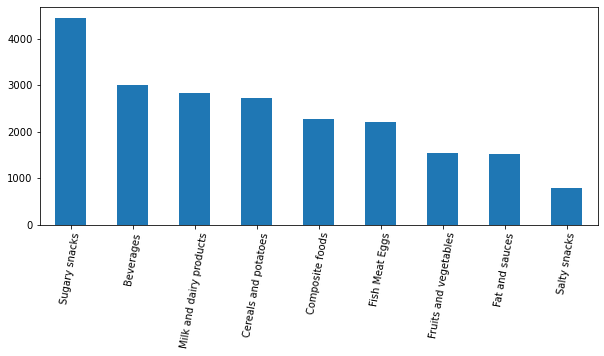

In [105]:
plt.figure(figsize = (10,4))
g = df_pnnsg1['pnns_groups_1'].value_counts().plot(kind='bar')
g.set_xticklabels(g.get_xticklabels(),rotation = 80)
plt.show()

In [106]:
df_dataFR_final_KNN.loc[df_index, 'pnns_groups_1'] = df_pnnsg1.loc[df_index, 'pnns_groups_1']

In [107]:
df_dataFR_final_KNN.isna().sum()

product_name                           0
brands                                 0
pnns_groups_2                      21206
pnns_groups_1                          0
energy_100g                            0
salt_100g                              0
sugars_100g                            0
saturated-fat_100g                     0
nutrition-score-fr_100g              848
nutrition_grade_fr                   848
fiber_100g                             0
serving_size                           0
Taux de remplissage indicateurs        0
dtype: int64

In [108]:
# Enfin, on finit de compléter les colonnes 'pnns_groups_2', 'nutrition-score-fr_100g' et 'nutrition_grade_fr' 
# en utilisant un KNNImputer.

df_dataFR_final_KNN['nutrition-score-fr_100g'].unique()

array([ 22.,  14.,  13.,  15.,  12.,   6.,  26.,  18.,  20.,  -2.,   1.,
        11.,  19.,   4.,   2.,   7.,  17.,   5.,  -4.,  25.,  nan,   0.,
        23.,   3.,  -3.,  16.,   9.,  24.,  21.,   8.,  -1.,  10.,  -5.,
        -6.,  29.,  35.,  27.,  28.,  -7.,  -9.,  36.,  32.,  30.,  -8.,
        33.,  40., -10., -11.,  31., -12.,  34., -13., -14., -15.])

In [109]:
df_dataFR_final_KNN['nutrition_grade_fr'].notna().sum()

60546

In [110]:
df_knn_imput = df_dataFR_final_KNN[['pnns_groups_2', 'pnns_groups_1', 'energy_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g'
                                   , 'nutrition-score-fr_100g', 'nutrition_grade_fr', 'fiber_100g']]

In [111]:
df_knn_imput.isna().sum()

pnns_groups_2              21206
pnns_groups_1                  0
energy_100g                    0
salt_100g                      0
sugars_100g                    0
saturated-fat_100g             0
nutrition-score-fr_100g      848
nutrition_grade_fr           848
fiber_100g                     0
dtype: int64

In [112]:
# On encode dans un premier temps les variables 'pnns_groups_2', 'pnns_groups_1' et 'nutrition_grade_fr' avec un OneHotEncoder.

# Commençons par 'pnns_groups_2'.

from sklearn.preprocessing import OneHotEncoder

pnnsg2_OHEncoder = OneHotEncoder()
df_knn_imput_index = df_knn_imput.index
pnnsg2_NaN_index = df_knn_imput['pnns_groups_2'][df_knn_imput['pnns_groups_2'].isna()].index
df_OHE_pnnsg2 = pnnsg2_OHEncoder.fit_transform(df_knn_imput[['pnns_groups_2']])

In [113]:
df_OHE_pnnsg2

<61394x37 sparse matrix of type '<class 'numpy.float64'>'
	with 61394 stored elements in Compressed Sparse Row format>

In [114]:
df_OHE_pnnsg2 = pd.DataFrame(data=df_OHE_pnnsg2.toarray(), index=df_knn_imput_index)

In [115]:
df_OHE_pnnsg2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
320741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
320751,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [116]:
df_OHE_pnnsg2.loc[pnnsg2_NaN_index, :]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
320698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
320740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
320741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [117]:
# Pour chaque ligne NaN, on remplace le 1 de la catégorie NaN par des NaN sur toute la ligne.

df_OHE_pnnsg2.loc[pnnsg2_NaN_index, :] = np.nan

In [118]:
df_OHE_pnnsg2.loc[pnnsg2_NaN_index, :]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
df_OHE_pnnsg2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320751,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df_OHE_pnnsg2.columns

RangeIndex(start=0, stop=37, step=1)

In [121]:
column_names = ['pnns_g2_'+str(i) for i in df_OHE_pnnsg2.columns]

In [122]:
df_OHE_pnnsg2.columns = column_names

In [123]:
df_OHE_pnnsg2

,pnns_g2_0,pnns_g2_1,pnns_g2_2,pnns_g2_3,pnns_g2_4,pnns_g2_5,pnns_g2_6,pnns_g2_7,pnns_g2_8,pnns_g2_9,pnns_g2_10,pnns_g2_11,pnns_g2_12,pnns_g2_13,pnns_g2_14,pnns_g2_15,pnns_g2_16,pnns_g2_17,pnns_g2_18,pnns_g2_19,pnns_g2_20,pnns_g2_21,pnns_g2_22,pnns_g2_23,pnns_g2_24,pnns_g2_25,pnns_g2_26,pnns_g2_27,pnns_g2_28,pnns_g2_29,pnns_g2_30,pnns_g2_31,pnns_g2_32,pnns_g2_33,pnns_g2_34,pnns_g2_35,pnns_g2_36
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320751,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
# Encodons ensuite 'pnns_groups_1'.

pnnsg1_OHEncoder = OneHotEncoder()
df_OHE_pnnsg1 = pnnsg1_OHEncoder.fit_transform(df_knn_imput[['pnns_groups_1']])

In [125]:
df_OHE_pnnsg1

<61394x9 sparse matrix of type '<class 'numpy.float64'>'
	with 61394 stored elements in Compressed Sparse Row format>

In [126]:
df_OHE_pnnsg1 = pd.DataFrame(data=df_OHE_pnnsg1.toarray(), index=df_knn_imput_index, columns=['pnns_g1_'+str(i) for i in range(0,9)])

In [127]:
df_OHE_pnnsg1

,pnns_g1_0,pnns_g1_1,pnns_g1_2,pnns_g1_3,pnns_g1_4,pnns_g1_5,pnns_g1_6,pnns_g1_7,pnns_g1_8
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
226,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
320740,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
320741,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
320751,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320757,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [128]:
# Encodons ensuite 'nutrition_grade_fr'.

nutrigrade_OHEncoder = OneHotEncoder()
nutrigrade_NaN_index = df_knn_imput['nutrition_grade_fr'][df_knn_imput['nutrition_grade_fr'].isna()].index
df_OHE_nutrigrade = nutrigrade_OHEncoder.fit_transform(df_knn_imput[['nutrition_grade_fr']])

In [129]:
df_OHE_nutrigrade

<61394x6 sparse matrix of type '<class 'numpy.float64'>'
	with 61394 stored elements in Compressed Sparse Row format>

In [130]:
df_OHE_nutrigrade = pd.DataFrame(data=df_OHE_nutrigrade.toarray(), index=df_knn_imput_index, columns=['nutrigrade_'+str(i) for i in range(0,6)])

In [131]:
df_OHE_nutrigrade

,nutrigrade_0,nutrigrade_1,nutrigrade_2,nutrigrade_3,nutrigrade_4,nutrigrade_5
106,0.0,0.0,0.0,0.0,1.0,0.0
190,0.0,0.0,0.0,1.0,0.0,0.0
191,0.0,0.0,0.0,1.0,0.0,0.0
226,0.0,0.0,0.0,0.0,1.0,0.0
234,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
320740,0.0,0.0,0.0,1.0,0.0,0.0
320741,0.0,1.0,0.0,0.0,0.0,0.0
320751,1.0,0.0,0.0,0.0,0.0,0.0
320757,0.0,1.0,0.0,0.0,0.0,0.0


In [132]:
df_OHE_nutrigrade.loc[nutrigrade_NaN_index, :]

,nutrigrade_0,nutrigrade_1,nutrigrade_2,nutrigrade_3,nutrigrade_4,nutrigrade_5
774,0.0,0.0,0.0,0.0,0.0,1.0
35740,0.0,0.0,0.0,0.0,0.0,1.0
57344,0.0,0.0,0.0,0.0,0.0,1.0
59482,0.0,0.0,0.0,0.0,0.0,1.0
69175,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
320528,0.0,0.0,0.0,0.0,0.0,1.0
320529,0.0,0.0,0.0,0.0,0.0,1.0
320530,0.0,0.0,0.0,0.0,0.0,1.0
320531,0.0,0.0,0.0,0.0,0.0,1.0


In [133]:
# Pour chaque ligne NaN, on remplace le 1 de la catégorie NaN par des NaN sur toute la ligne.

df_OHE_nutrigrade.loc[nutrigrade_NaN_index, :] = np.nan

In [134]:
df_OHE_nutrigrade.loc[nutrigrade_NaN_index, :]

,nutrigrade_0,nutrigrade_1,nutrigrade_2,nutrigrade_3,nutrigrade_4,nutrigrade_5
774,NaN,NaN,NaN,NaN,NaN,NaN
35740,NaN,NaN,NaN,NaN,NaN,NaN
57344,NaN,NaN,NaN,NaN,NaN,NaN
59482,NaN,NaN,NaN,NaN,NaN,NaN
69175,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
320528,NaN,NaN,NaN,NaN,NaN,NaN
320529,NaN,NaN,NaN,NaN,NaN,NaN
320530,NaN,NaN,NaN,NaN,NaN,NaN
320531,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
# On ajoute les colonnes encodées au dataframe 'df_knn_imput'.

df_knn_imput = df_knn_imput.join(df_OHE_pnnsg2)
df_knn_imput = df_knn_imput.join(df_OHE_pnnsg1)
df_knn_imput = df_knn_imput.join(df_OHE_nutrigrade)

In [136]:
# On supprime les colonnes non encodées 'pnns_groups_2', 'pnns_groups_1' et 'nutrition_grade_fr'.

df_knn_imput = df_knn_imput.drop(['pnns_groups_2', 'pnns_groups_1', 'nutrition_grade_fr'], axis=1)

In [137]:
df_knn_imput

,energy_100g,salt_100g,sugars_100g,saturated-fat_100g,nutrition-score-fr_100g,fiber_100g,pnns_g2_0,pnns_g2_1,pnns_g2_2,pnns_g2_3,pnns_g2_4,pnns_g2_5,pnns_g2_6,pnns_g2_7,pnns_g2_8,pnns_g2_9,pnns_g2_10,pnns_g2_11,pnns_g2_12,pnns_g2_13,pnns_g2_14,pnns_g2_15,pnns_g2_16,pnns_g2_17,pnns_g2_18,pnns_g2_19,pnns_g2_20,pnns_g2_21,pnns_g2_22,pnns_g2_23,pnns_g2_24,pnns_g2_25,pnns_g2_26,pnns_g2_27,pnns_g2_28,pnns_g2_29,pnns_g2_30,pnns_g2_31,pnns_g2_32,pnns_g2_33,pnns_g2_34,pnns_g2_35,pnns_g2_36,pnns_g1_0,pnns_g1_1,pnns_g1_2,pnns_g1_3,pnns_g1_4,pnns_g1_5,pnns_g1_6,pnns_g1_7,pnns_g1_8,nutrigrade_0,nutrigrade_1,nutrigrade_2,nutrigrade_3,nutrigrade_4,nutrigrade_5
106,1883.0,0.09652,57.50,12.50,22.0,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
190,1753.0,0.01000,87.70,0.80,14.0,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
191,2406.0,0.00300,50.30,2.90,14.0,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
226,177.0,0.02540,10.40,0.00,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
234,1079.0,0.80000,1.00,11.00,15.0,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,1084.0,0.29000,10.50,12.00,16.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
320741,4.0,10.00000,1.00,1.00,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
320751,1643.0,0.68000,2.60,0.60,-4.0,5.9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
320757,2406.0,0.10000,3.89,3.73,0.0,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [138]:
# On normalise les variables 'energy_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g', 'nutrition-score-fr_100g' et
# 'fiber_100g' en utilisant un RobustScaler.

var_encoder = RobustScaler()
df_knn_imput.loc[:,['energy_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g', 'nutrition-score-fr_100g',
                    'fiber_100g']] = var_encoder.fit_transform(df_knn_imput.loc[:,['energy_100g', 'salt_100g', 'sugars_100g',
                                                                                   'saturated-fat_100g', 'nutrition-score-fr_100g',
                                                                                   'fiber_100g']])

In [139]:
df_knn_imput

,energy_100g,salt_100g,sugars_100g,saturated-fat_100g,nutrition-score-fr_100g,fiber_100g,pnns_g2_0,pnns_g2_1,pnns_g2_2,pnns_g2_3,pnns_g2_4,pnns_g2_5,pnns_g2_6,pnns_g2_7,pnns_g2_8,pnns_g2_9,pnns_g2_10,pnns_g2_11,pnns_g2_12,pnns_g2_13,pnns_g2_14,pnns_g2_15,pnns_g2_16,pnns_g2_17,pnns_g2_18,pnns_g2_19,pnns_g2_20,pnns_g2_21,pnns_g2_22,pnns_g2_23,pnns_g2_24,pnns_g2_25,pnns_g2_26,pnns_g2_27,pnns_g2_28,pnns_g2_29,pnns_g2_30,pnns_g2_31,pnns_g2_32,pnns_g2_33,pnns_g2_34,pnns_g2_35,pnns_g2_36,pnns_g1_0,pnns_g1_1,pnns_g1_2,pnns_g1_3,pnns_g1_4,pnns_g1_5,pnns_g1_6,pnns_g1_7,pnns_g1_8,nutrigrade_0,nutrigrade_1,nutrigrade_2,nutrigrade_3,nutrigrade_4,nutrigrade_5
106,0.692623,-0.399552,3.262195,1.492958,0.928571,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
190,0.586066,-0.474138,5.103659,-0.154930,0.357143,-0.126437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
191,1.121311,-0.480172,2.823171,0.140845,0.357143,0.735632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
226,-0.705738,-0.460862,0.390244,-0.267606,0.285714,-0.385057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
234,0.033607,0.206897,-0.182927,1.281690,0.428571,0.017241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,0.037705,-0.232759,0.396341,1.422535,0.500000,-0.385057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
320741,-0.847541,8.137931,-0.182927,-0.126761,-0.642857,2.488506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
320751,0.495902,0.103448,-0.085366,-0.183099,-0.928571,1.310345,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
320757,1.121311,-0.396552,-0.006707,0.257746,-0.642857,3.120690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [140]:
column_names = df_knn_imput.columns
df_index = df_knn_imput.index

In [141]:
# On applique le k-NN Imputer.

imputer = KNNImputer()
df_knn_imput = imputer.fit_transform(df_knn_imput)

In [142]:
df_knn_imput = pd.DataFrame(data=df_knn_imput, columns=column_names, index=df_index)

In [143]:
df_knn_imput

,energy_100g,salt_100g,sugars_100g,saturated-fat_100g,nutrition-score-fr_100g,fiber_100g,pnns_g2_0,pnns_g2_1,pnns_g2_2,pnns_g2_3,pnns_g2_4,pnns_g2_5,pnns_g2_6,pnns_g2_7,pnns_g2_8,pnns_g2_9,pnns_g2_10,pnns_g2_11,pnns_g2_12,pnns_g2_13,pnns_g2_14,pnns_g2_15,pnns_g2_16,pnns_g2_17,pnns_g2_18,pnns_g2_19,pnns_g2_20,pnns_g2_21,pnns_g2_22,pnns_g2_23,pnns_g2_24,pnns_g2_25,pnns_g2_26,pnns_g2_27,pnns_g2_28,pnns_g2_29,pnns_g2_30,pnns_g2_31,pnns_g2_32,pnns_g2_33,pnns_g2_34,pnns_g2_35,pnns_g2_36,pnns_g1_0,pnns_g1_1,pnns_g1_2,pnns_g1_3,pnns_g1_4,pnns_g1_5,pnns_g1_6,pnns_g1_7,pnns_g1_8,nutrigrade_0,nutrigrade_1,nutrigrade_2,nutrigrade_3,nutrigrade_4,nutrigrade_5
106,0.692623,-0.399552,3.262195,1.492958,0.928571,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
190,0.586066,-0.474138,5.103659,-0.154930,0.357143,-0.126437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
191,1.121311,-0.480172,2.823171,0.140845,0.357143,0.735632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
226,-0.705738,-0.460862,0.390244,-0.267606,0.285714,-0.385057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
234,0.033607,0.206897,-0.182927,1.281690,0.428571,0.017241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,0.037705,-0.232759,0.396341,1.422535,0.500000,-0.385057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
320741,-0.847541,8.137931,-0.182927,-0.126761,-0.642857,2.488506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
320751,0.495902,0.103448,-0.085366,-0.183099,-0.928571,1.310345,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
320757,1.121311,-0.396552,-0.006707,0.257746,-0.642857,3.120690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [144]:
# On supprime les colonnes 'pnns_g2_36' et 'nutrigrade_5' qui correpsondent aux catégories NaN du OneHotEncoder.

df_knn_imput = df_knn_imput.drop(['pnns_g2_36', 'nutrigrade_5'], axis=1)

In [145]:
df_knn_imput.isna().sum()

energy_100g                0
salt_100g                  0
sugars_100g                0
saturated-fat_100g         0
nutrition-score-fr_100g    0
fiber_100g                 0
pnns_g2_0                  0
pnns_g2_1                  0
pnns_g2_2                  0
pnns_g2_3                  0
pnns_g2_4                  0
pnns_g2_5                  0
pnns_g2_6                  0
pnns_g2_7                  0
pnns_g2_8                  0
pnns_g2_9                  0
pnns_g2_10                 0
pnns_g2_11                 0
pnns_g2_12                 0
pnns_g2_13                 0
pnns_g2_14                 0
pnns_g2_15                 0
pnns_g2_16                 0
pnns_g2_17                 0
pnns_g2_18                 0
pnns_g2_19                 0
pnns_g2_20                 0
pnns_g2_21                 0
pnns_g2_22                 0
pnns_g2_23                 0
pnns_g2_24                 0
pnns_g2_25                 0
pnns_g2_26                 0
pnns_g2_27                 0
pnns_g2_28    

In [146]:
# Pour chaque variable 'pnns_groups_2' et 'nutrition_grade_fr', pour les lignes NaN qui ont été remplis par le KNNImputer() 
# il y a des chiffres entre 0 et 1 dans plusieurs des colonnes 'pnns_g2_i' pour i allant de 0 à 35 et dans plusieurs des
# colonnes 'nutrigrade_j' pour j allant de 0 à 4.

# Donc pour que l'on puisse appliquer le inverse_transform du OneHotEncoder on va prendre comme hypothèse que l'on choisit le
# maximum sur la ligne pour lui attribuer la valeur de 1 et 0 aux autres colonnes. En cas d'égalité sur une même ligne
# on choisit d'appliquer 1 à la première colonne possédant ce maximum.

# On va appliquer ce procédé pour la variable 'pnns_groups_2' puis pour 'nutrition_grade_fr'.

In [147]:
# Commençons par la variable 'pnns_groups_2'.

df_pnns_g2 = df_knn_imput.loc[:,'pnns_g2_0':'pnns_g2_35']

In [148]:
# On ne regarde que les lignes où il y avait un NaN.

df_pnns_g2 = df_pnns_g2.loc[pnnsg2_NaN_index,:]

In [149]:
df_pnns_g2

,pnns_g2_0,pnns_g2_1,pnns_g2_2,pnns_g2_3,pnns_g2_4,pnns_g2_5,pnns_g2_6,pnns_g2_7,pnns_g2_8,pnns_g2_9,pnns_g2_10,pnns_g2_11,pnns_g2_12,pnns_g2_13,pnns_g2_14,pnns_g2_15,pnns_g2_16,pnns_g2_17,pnns_g2_18,pnns_g2_19,pnns_g2_20,pnns_g2_21,pnns_g2_22,pnns_g2_23,pnns_g2_24,pnns_g2_25,pnns_g2_26,pnns_g2_27,pnns_g2_28,pnns_g2_29,pnns_g2_30,pnns_g2_31,pnns_g2_32,pnns_g2_33,pnns_g2_34,pnns_g2_35
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0
190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320690,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0
320698,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0


In [150]:
# On crée une colonne dans laquelle on indique le nom de la colonne où il y a le maximum de la ligne.
# (en cas d'égalité c'est le nom de la colonne du 1er maximum rencontré qui est indiqué)

df_pnns_g2['maxValueIndex'] = df_pnns_g2.idxmax(axis=1)

In [151]:
df_pnns_g2

,pnns_g2_0,pnns_g2_1,pnns_g2_2,pnns_g2_3,pnns_g2_4,pnns_g2_5,pnns_g2_6,pnns_g2_7,pnns_g2_8,pnns_g2_9,pnns_g2_10,pnns_g2_11,pnns_g2_12,pnns_g2_13,pnns_g2_14,pnns_g2_15,pnns_g2_16,pnns_g2_17,pnns_g2_18,pnns_g2_19,pnns_g2_20,pnns_g2_21,pnns_g2_22,pnns_g2_23,pnns_g2_24,pnns_g2_25,pnns_g2_26,pnns_g2_27,pnns_g2_28,pnns_g2_29,pnns_g2_30,pnns_g2_31,pnns_g2_32,pnns_g2_33,pnns_g2_34,pnns_g2_35,maxValueIndex
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,pnns_g2_32
190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,pnns_g2_32
191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,pnns_g2_32
234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pnns_g2_25
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pnns_g2_15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320690,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,pnns_g2_3
320698,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pnns_g2_3
320740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pnns_g2_9
320741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,pnns_g2_24


In [152]:
df_pnns_g2.loc[:,'pnns_g2_0':'pnns_g2_35'] = 0

In [153]:
for i in pnnsg2_NaN_index:
    df_pnns_g2.loc[i,df_pnns_g2['maxValueIndex'][i]] = 1

In [154]:
df_pnns_g2

,pnns_g2_0,pnns_g2_1,pnns_g2_2,pnns_g2_3,pnns_g2_4,pnns_g2_5,pnns_g2_6,pnns_g2_7,pnns_g2_8,pnns_g2_9,pnns_g2_10,pnns_g2_11,pnns_g2_12,pnns_g2_13,pnns_g2_14,pnns_g2_15,pnns_g2_16,pnns_g2_17,pnns_g2_18,pnns_g2_19,pnns_g2_20,pnns_g2_21,pnns_g2_22,pnns_g2_23,pnns_g2_24,pnns_g2_25,pnns_g2_26,pnns_g2_27,pnns_g2_28,pnns_g2_29,pnns_g2_30,pnns_g2_31,pnns_g2_32,pnns_g2_33,pnns_g2_34,pnns_g2_35,maxValueIndex
106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,pnns_g2_32
190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,pnns_g2_32
191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,pnns_g2_32
234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,pnns_g2_25
307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,pnns_g2_15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320690,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,pnns_g2_3
320698,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,pnns_g2_3
320740,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,pnns_g2_9
320741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,pnns_g2_24


In [155]:
df_pnns_g2 = df_pnns_g2.loc[:,'pnns_g2_0':'pnns_g2_35']

In [156]:
# On rajoute la colonne 'pnns_g2_36' pour que l'inverse_transform retrouve bien 37 colonnes.

df_pnns_g2['pnns_g2_36'] = 0

In [157]:
df_pnns_g2

,pnns_g2_0,pnns_g2_1,pnns_g2_2,pnns_g2_3,pnns_g2_4,pnns_g2_5,pnns_g2_6,pnns_g2_7,pnns_g2_8,pnns_g2_9,pnns_g2_10,pnns_g2_11,pnns_g2_12,pnns_g2_13,pnns_g2_14,pnns_g2_15,pnns_g2_16,pnns_g2_17,pnns_g2_18,pnns_g2_19,pnns_g2_20,pnns_g2_21,pnns_g2_22,pnns_g2_23,pnns_g2_24,pnns_g2_25,pnns_g2_26,pnns_g2_27,pnns_g2_28,pnns_g2_29,pnns_g2_30,pnns_g2_31,pnns_g2_32,pnns_g2_33,pnns_g2_34,pnns_g2_35,pnns_g2_36
106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320690,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
320698,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
320740,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
320741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [158]:
# On applique l'inverse_transform et on attribue les valeurs aux NaN de la colonne 'pnns_groups_2'.

df_dataFR_final_KNN.loc[pnnsg2_NaN_index, 'pnns_groups_2'] = pnnsg2_OHEncoder.inverse_transform(df_pnns_g2)

In [159]:
df_dataFR_final_KNN.loc[pnnsg2_NaN_index,:]

,product_name,brands,pnns_groups_2,pnns_groups_1,energy_100g,salt_100g,sugars_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition_grade_fr,fiber_100g,serving_size,Taux de remplissage indicateurs
106,Lion Peanut x2,Sunridge,Sweets,Sugary snacks,1883.0,0.09652,57.50,12.50,22.0,e,2.5,40 g (0.25 cup),1.0
190,Mini Confettis,Alice Délice,Sweets,Sugary snacks,1753.0,0.01000,87.70,0.80,14.0,d,0.9,unknown,1.0
191,Praliné Amande Et Noisette,Alice Délice,Sweets,Sugary snacks,2406.0,0.00300,50.30,2.90,14.0,d,3.9,unknown,1.0
234,Tarte Poireaux Et Lardons,Bo Frost,Pizza pies and quiche,Composite foods,1079.0,0.80000,1.00,11.00,15.0,d,1.4,unknown,1.0
307,Beignets framboises,Intermarché,Fruit juices,Beverages,1272.0,0.70000,12.70,1.70,6.0,c,0.0,unknown,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320690,Peanut & Popcorn With Dark Chocolate 12 x 45G,Great value,Biscuits and cakes,Sugary snacks,1883.0,0.40000,34.10,7.80,15.0,d,5.4,unknown,1.0
320698,Eat Natural Protein Packed,Biobio,Biscuits and cakes,Sugary snacks,1996.0,1.00000,22.00,10.00,17.0,d,6.0,unknown,1.0
320740,Verrine Cheescake Myrtille,Kayser,Dairy desserts,Milk and dairy products,1084.0,0.29000,10.50,12.00,16.0,d,0.0,unknown,1.0
320741,Fiche Brevet,Hatier,One-dish meals,Composite foods,4.0,10.00000,1.00,1.00,0.0,b,10.0,unknown,1.0


In [160]:
# Faisons maintenant la même manipulation pour la variable 'nutrition_grade_fr'.

df_nutrigrade = df_knn_imput.loc[:,'nutrigrade_0':'nutrigrade_4']

In [161]:
# On ne regarde que les lignes où il y avait un NaN.

df_nutrigrade = df_nutrigrade.loc[nutrigrade_NaN_index,:]

In [162]:
df_nutrigrade

,nutrigrade_0,nutrigrade_1,nutrigrade_2,nutrigrade_3,nutrigrade_4
774,0.0,0.0,1.0,0.0,0.0
35740,1.0,0.0,0.0,0.0,0.0
57344,0.0,0.0,0.6,0.2,0.2
59482,0.0,0.0,0.0,1.0,0.0
69175,0.0,0.2,0.8,0.0,0.0
...,...,...,...,...,...
320528,0.0,0.0,0.4,0.4,0.2
320529,0.0,0.0,0.2,0.6,0.2
320530,0.0,0.0,0.2,0.6,0.2
320531,0.0,0.0,0.2,0.6,0.2


In [163]:
# On crée une colonne dans laquelle on indique le nom de la colonne où il y a le maximum de la ligne.
# (en cas d'égalité c'est le nom de la colonne du 1er maximum rencontré qui est indiqué)

df_nutrigrade['maxValueIndex'] = df_nutrigrade.idxmax(axis=1)

In [164]:
df_nutrigrade

,nutrigrade_0,nutrigrade_1,nutrigrade_2,nutrigrade_3,nutrigrade_4,maxValueIndex
774,0.0,0.0,1.0,0.0,0.0,nutrigrade_2
35740,1.0,0.0,0.0,0.0,0.0,nutrigrade_0
57344,0.0,0.0,0.6,0.2,0.2,nutrigrade_2
59482,0.0,0.0,0.0,1.0,0.0,nutrigrade_3
69175,0.0,0.2,0.8,0.0,0.0,nutrigrade_2
...,...,...,...,...,...,...
320528,0.0,0.0,0.4,0.4,0.2,nutrigrade_2
320529,0.0,0.0,0.2,0.6,0.2,nutrigrade_3
320530,0.0,0.0,0.2,0.6,0.2,nutrigrade_3
320531,0.0,0.0,0.2,0.6,0.2,nutrigrade_3


In [165]:
df_nutrigrade.loc[:,'nutrigrade_0':'nutrigrade_4'] = 0

for i in nutrigrade_NaN_index:
    df_nutrigrade.loc[i,df_nutrigrade['maxValueIndex'][i]] = 1

In [166]:
df_nutrigrade

,nutrigrade_0,nutrigrade_1,nutrigrade_2,nutrigrade_3,nutrigrade_4,maxValueIndex
774,0,0,1,0,0,nutrigrade_2
35740,1,0,0,0,0,nutrigrade_0
57344,0,0,1,0,0,nutrigrade_2
59482,0,0,0,1,0,nutrigrade_3
69175,0,0,1,0,0,nutrigrade_2
...,...,...,...,...,...,...
320528,0,0,1,0,0,nutrigrade_2
320529,0,0,0,1,0,nutrigrade_3
320530,0,0,0,1,0,nutrigrade_3
320531,0,0,0,1,0,nutrigrade_3


In [167]:
df_nutrigrade = df_nutrigrade.loc[:,'nutrigrade_0':'nutrigrade_4']

In [168]:
# On rajoute la colonne 'nutrigrade_5' pour que l'inverse_transform retrouve bien 6 colonnes.

df_nutrigrade['nutrigrade_5'] = 0

In [169]:
df_nutrigrade

,nutrigrade_0,nutrigrade_1,nutrigrade_2,nutrigrade_3,nutrigrade_4,nutrigrade_5
774,0,0,1,0,0,0
35740,1,0,0,0,0,0
57344,0,0,1,0,0,0
59482,0,0,0,1,0,0
69175,0,0,1,0,0,0
...,...,...,...,...,...,...
320528,0,0,1,0,0,0
320529,0,0,0,1,0,0
320530,0,0,0,1,0,0
320531,0,0,0,1,0,0


In [170]:
# On applique l'inverse_transform et on attribue les valeurs aux NaN de la colonne 'nutrition_grade_fr'.

df_dataFR_final_KNN.loc[nutrigrade_NaN_index, 'nutrition_grade_fr'] = nutrigrade_OHEncoder.inverse_transform(df_nutrigrade)

In [171]:
df_dataFR_final_KNN.loc[nutrigrade_NaN_index,:]

,product_name,brands,pnns_groups_2,pnns_groups_1,energy_100g,salt_100g,sugars_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition_grade_fr,fiber_100g,serving_size,Taux de remplissage indicateurs
774,Balsamic vinegar of Modena,De Nigris,Artificially sweetened beverages,Beverages,63.0,0.00000,3.00,0.00,NaN,c,0.0,15 ml,1.0
35740,Sunny fruit,Dole,Fruits,Fruits and vegetables,256.0,0.10000,14.00,0.10,NaN,a,0.6,unknown,1.0
57344,Yellow Curry Paste,"Mae Ploy,ตราแม่พลอย, Theppadungporn Coconut Co...",Dressings and sauces,Fat and sauces,628.0,14.47800,10.00,0.88,NaN,c,10.0,10 g (2 tsp),0.8
59482,6 Cumberland sausages,Marks & Spencer,One-dish meals,Composite foods,1070.0,1.24000,0.15,7.65,NaN,d,0.0,"66,7 g (1 saucisse)",0.8
69175,Twinings fresh thé vert citron,Twinings of London,Non-sugared beverages,Beverages,17.0,0.00200,0.50,0.10,NaN,c,0.5,100 ml,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320528,Nouilles orientales arôme de boeuf 85 g - Mamee,Mamee,One-dish meals,Composite foods,1848.0,3.06324,10.20,9.30,NaN,c,10.6,85 g,1.0
320529,Nouilles orientales arôme de poulet - 85 g - M...,Mamee,One-dish meals,Composite foods,1806.0,3.94970,8.30,8.90,NaN,d,7.0,85 g,1.0
320530,Nouilles orientales au curry - 85 g - Mamee,Mamee,One-dish meals,Composite foods,1806.0,3.16230,8.20,10.00,NaN,d,11.8,85 g,1.0
320531,Nouilles orientales arôme de champignons - 85 ...,Mamee,One-dish meals,Composite foods,1602.0,3.99796,6.50,8.30,NaN,d,5.6,85 g,1.0


In [172]:
# Pour la variable 'nutrition-score-fr_100g', on inverse_transform dans un premier temps les résultats de la variable.

df_knn_imput.loc[:,'energy_100g':'fiber_100g'] = var_encoder.inverse_transform(df_knn_imput.loc[:,'energy_100g':'fiber_100g'])

In [173]:
df_knn_imput.loc[:,'energy_100g':'fiber_100g']

,energy_100g,salt_100g,sugars_100g,saturated-fat_100g,nutrition-score-fr_100g,fiber_100g
106,1883.0,0.09652,57.50,12.50,22.0,2.5
190,1753.0,0.01000,87.70,0.80,14.0,0.9
191,2406.0,0.00300,50.30,2.90,14.0,3.9
226,177.0,0.02540,10.40,0.00,13.0,0.0
234,1079.0,0.80000,1.00,11.00,15.0,1.4
...,...,...,...,...,...,...
320740,1084.0,0.29000,10.50,12.00,16.0,0.0
320741,4.0,10.00000,1.00,1.00,0.0,10.0
320751,1643.0,0.68000,2.60,0.60,-4.0,5.9
320757,2406.0,0.10000,3.89,3.73,0.0,12.2


In [174]:
df_knn_imput.loc[nutrigrade_NaN_index, 'nutrition-score-fr_100g'].unique()

array([  4.4,  -2. ,  12.4,  15.2,   1.8,  12.8,  -1.8,  -1.8,   1.6,
         3.2,   4. ,  16.2,  13. ,  20.6,  17.2,  16. ,   7.8,   0.6,
        15.8,   2.4,   4.8,   8.6,   6.2,   2. ,  15. ,  -4.4,  27.4,
        13.8,  14.4,  14.6,  10.8,   0.8,   0. ,  -2. ,  20.2,  19.6,
        -2.8,  -7.4,  -5.8,   6.4,  22.4,  -0.2,  -2.2,   0.6,  12. ,
        -0.2,   0.2,   9.6,  20.8,  20.4,   1.4,   2.8,   9.8,  -0.4,
         2.8,  14. ,   4. ,  12.6,   8.8,   5.8,   6. ,  24. ,  14.8,
         2. ,  21.4,   9.4,  11.4,  14.2,  15.4,  16.4,  -3.8,  11.2,
        16.4,   3. ,   1. ,  10.6,  10. ,   3.6,   0.4,   5.6,   3.2,
         1.2,   3.4,   1.8,   2.2,  -2.4,  -0.6,  27.8,  18.6,  16.6,
         5.4,   8.2,   7.4,  -6.4,   0.4,  -7.2,  13.6,  -4. ,  -5.6,
        -5.4,  -1. ,   5.2,  -3.4,  -5.4,   9. ,  23.2,  19.2,  -0.4,
         7.6,  22.2,  13.4,  10.4,   1.6,  -3. ,  17. ,  11.8,  19.2,
        11. ,  18.4,  -4.6,  -5. ,  23.8,  10.2,  12.2,  18.2,  -1.4,
        -5.2,  16.8,

In [175]:
# Ensuite on arrondit les résultats pour les lignes NaN car le 'nutrition-score-fr_100g' est une valeur entière.

df_knn_imput.loc[nutrigrade_NaN_index, 'nutrition-score-fr_100g'] = np.round(df_knn_imput.loc[nutrigrade_NaN_index, 'nutrition-score-fr_100g'])

In [176]:
df_knn_imput.loc[nutrigrade_NaN_index, 'nutrition-score-fr_100g'].unique()

array([  4.,  -2.,  12.,  15.,   2.,  13.,   3.,  16.,  21.,  17.,   8.,
         1.,   5.,   9.,   6.,  -4.,  27.,  14.,  11.,   0.,  20.,  -3.,
        -7.,  -6.,  22.,  10.,  24.,  -1.,  28.,  19.,   7.,  -5.,  23.,
        18.,  26.,  -8., -11., -13.,  -9., -10.,  25.])

In [177]:
# Enfin on affecte les résultats des lignes NaN dans la colonne 'nutrition-score-fr_100g' du dataframe df_dataFR_final_KNN.

df_dataFR_final_KNN.loc[nutrigrade_NaN_index,'nutrition-score-fr_100g'] = df_knn_imput.loc[nutrigrade_NaN_index, 'nutrition-score-fr_100g']

In [178]:
df_dataFR_final_KNN.loc[nutrigrade_NaN_index,:]

,product_name,brands,pnns_groups_2,pnns_groups_1,energy_100g,salt_100g,sugars_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition_grade_fr,fiber_100g,serving_size,Taux de remplissage indicateurs
774,Balsamic vinegar of Modena,De Nigris,Artificially sweetened beverages,Beverages,63.0,0.00000,3.00,0.00,4.0,c,0.0,15 ml,1.0
35740,Sunny fruit,Dole,Fruits,Fruits and vegetables,256.0,0.10000,14.00,0.10,-2.0,a,0.6,unknown,1.0
57344,Yellow Curry Paste,"Mae Ploy,ตราแม่พลอย, Theppadungporn Coconut Co...",Dressings and sauces,Fat and sauces,628.0,14.47800,10.00,0.88,12.0,c,10.0,10 g (2 tsp),0.8
59482,6 Cumberland sausages,Marks & Spencer,One-dish meals,Composite foods,1070.0,1.24000,0.15,7.65,15.0,d,0.0,"66,7 g (1 saucisse)",0.8
69175,Twinings fresh thé vert citron,Twinings of London,Non-sugared beverages,Beverages,17.0,0.00200,0.50,0.10,2.0,c,0.5,100 ml,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320528,Nouilles orientales arôme de boeuf 85 g - Mamee,Mamee,One-dish meals,Composite foods,1848.0,3.06324,10.20,9.30,13.0,c,10.6,85 g,1.0
320529,Nouilles orientales arôme de poulet - 85 g - M...,Mamee,One-dish meals,Composite foods,1806.0,3.94970,8.30,8.90,14.0,d,7.0,85 g,1.0
320530,Nouilles orientales au curry - 85 g - Mamee,Mamee,One-dish meals,Composite foods,1806.0,3.16230,8.20,10.00,13.0,d,11.8,85 g,1.0
320531,Nouilles orientales arôme de champignons - 85 ...,Mamee,One-dish meals,Composite foods,1602.0,3.99796,6.50,8.30,14.0,d,5.6,85 g,1.0


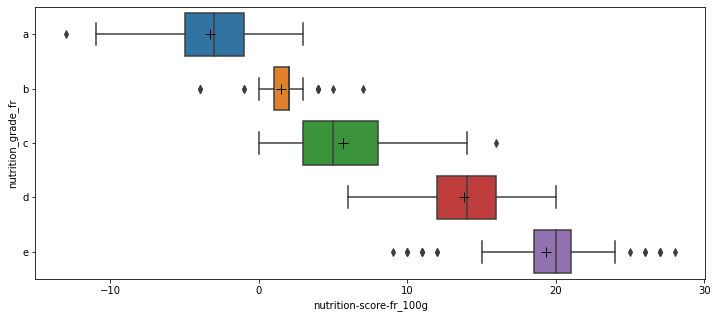

In [179]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df_dataFR_final_KNN.loc[nutrigrade_NaN_index,'nutrition-score-fr_100g'],
            y=df_dataFR_final_KNN.loc[nutrigrade_NaN_index,'nutrition_grade_fr'],
            showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
plt.show()

--> Les valeurs attribuées aux NaN des variables nutrigrade et nutriscore semblent cohérentes en ce qui concerne la corrélation entre 'nutrition-score-fr_100g' et 'nutrition_grade_fr'.

In [180]:
df_dataFR_final_KNN.isna().sum()

product_name                       0
brands                             0
pnns_groups_2                      0
pnns_groups_1                      0
energy_100g                        0
salt_100g                          0
sugars_100g                        0
saturated-fat_100g                 0
nutrition-score-fr_100g            0
nutrition_grade_fr                 0
fiber_100g                         0
serving_size                       0
Taux de remplissage indicateurs    0
dtype: int64

--> Toutes les valeurs manquantes ont été traitées.

# <a name="C5">Partie 2 : Analyse exploratoire des données

In [181]:
# Pour réaliser l'analyse exploratoire des données je vais réutiliser le dataframe sans les valeurs manquantes complétées par
# le k-NN pour pouvoir analyser les données qui avaient été directement renseignées par les utilisateurs. 

In [182]:
df_dataFR_analyse

,product_name,brands,pnns_groups_2,pnns_groups_1,energy_100g,salt_100g,sugars_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition_grade_fr,fiber_100g,serving_size
0,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
46,Filet de bœuf,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
106,Lion Peanut x2,Sunridge,NaN,NaN,1883.0,0.09652,57.5,12.5,22.0,e,2.5,40 g (0.25 cup)
136,Twix x2,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
138,Pack de 2 Twix,"Twix, Lundberg",NaN,NaN,1481.0,NaN,NaN,NaN,NaN,NaN,6.2,48 g (0.25 cup)
...,...,...,...,...,...,...,...,...,...,...,...,...
320761,Roussette du Bugey (2011),Roussette du Bugey,Alcoholic beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
320763,Thé vert Earl grey,Lobodis,Non-sugared beverages,Beverages,21.0,0.02540,0.5,0.2,2.0,c,0.2,unknown
320764,"Cheese cake thé vert, yuzu",unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
320765,Rillette d'oie,"Sans marque,D.Lambert",Processed meat,Fish Meat Eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown


In [183]:
df_dataFR_analyse.isna().sum()

product_name                   0
brands                         0
pnns_groups_2              36372
pnns_groups_1              38407
energy_100g                26343
salt_100g                  28249
sugars_100g                28310
saturated-fat_100g         28440
nutrition-score-fr_100g    29382
nutrition_grade_fr         29382
fiber_100g                 44807
serving_size                   0
dtype: int64

In [184]:
df_dataFR_analyse.dropna().shape

(25363, 12)

## <a name="C6">a) Analyses univariées

In [185]:
df_dataFR_analyse.describe()

,energy_100g,salt_100g,sugars_100g,saturated-fat_100g,nutrition-score-fr_100g,fiber_100g
count,63670.000000,61764.000000,61703.000000,61573.000000,60631.000000,45206.000000
mean,1109.830605,1.144775,13.386418,5.401466,8.662895,2.505181
std,771.746391,4.115196,19.037791,8.449251,9.036818,4.265487
min,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000
25%,427.000000,0.080000,1.000000,0.300000,1.000000,0.000000
50%,1033.000000,0.558800,4.000000,2.000000,9.000000,1.300000
75%,1644.000000,1.240000,17.600000,7.400000,15.000000,3.200000
max,3770.000000,100.000000,100.000000,100.000000,40.000000,100.000000


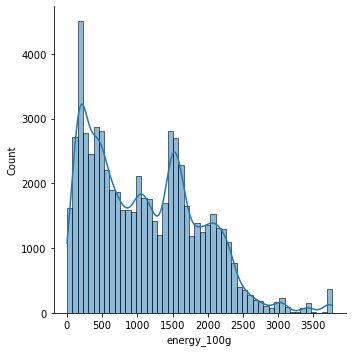

In [186]:
# Analyse de 'energy_100g'.

sns.displot(df_dataFR_analyse["energy_100g"], kde=True, bins=50)
plt.show()

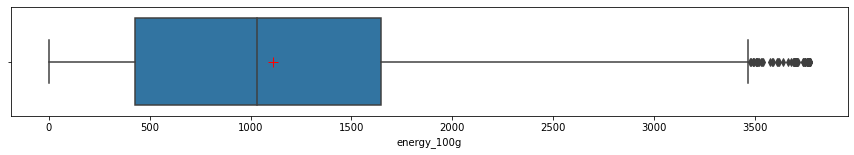

In [187]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df_dataFR_analyse["energy_100g"], showmeans=True, meanprops={"marker": "+", "markeredgecolor": "red", "markersize": "10"})
plt.show()

--> Distribution répartie de façon plutôt homogène.

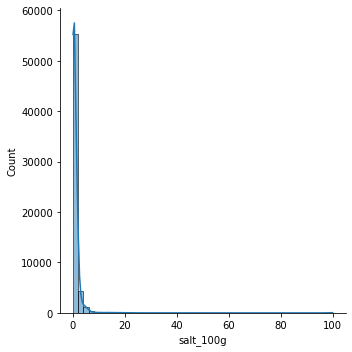

In [188]:
# Analyse de 'salt_100g'.

sns.displot(df_dataFR_analyse["salt_100g"], kde=True, bins=50)
plt.show()

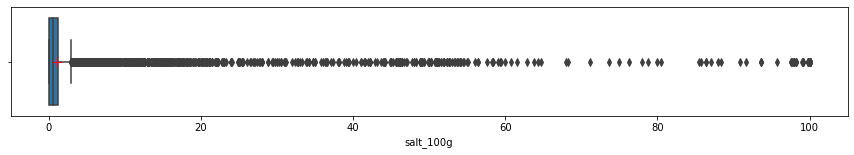

In [189]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df_dataFR_analyse["salt_100g"], showmeans=True, meanprops={"marker": "+", "markeredgecolor": "red", "markersize": "10"})
plt.show()

--> Distribution très resserée autour de la médiane.

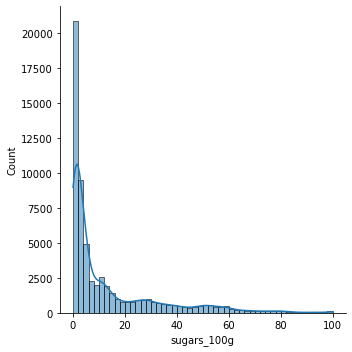

In [190]:
# Analyse de 'sugars_100g'.

sns.displot(df_dataFR_analyse["sugars_100g"], kde=True, bins=50)
plt.show()

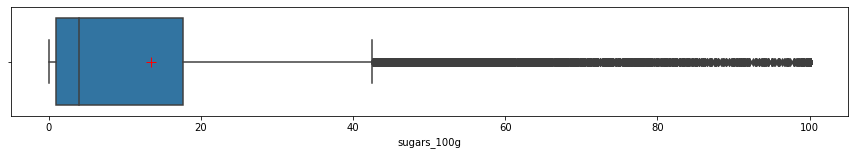

In [191]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df_dataFR_analyse["sugars_100g"], showmeans=True, meanprops={"marker": "+", "markeredgecolor": "red", "markersize": "10"})
plt.show()

--> Distribution dispersée sur la droite.

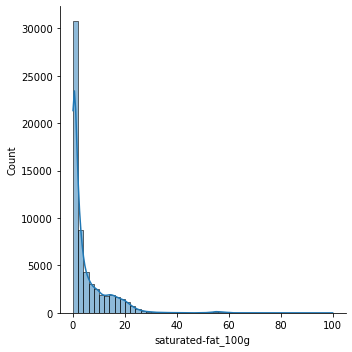

In [192]:
# Analyse de 'saturated-fat_100g'.

sns.displot(df_dataFR_analyse["saturated-fat_100g"], kde=True, bins=50)
plt.show()

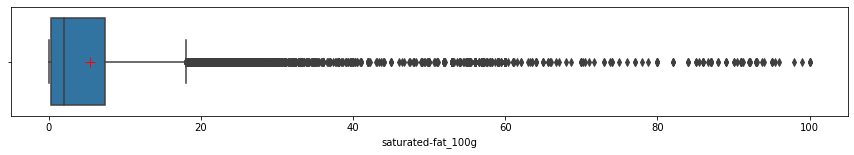

In [193]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df_dataFR_analyse["saturated-fat_100g"], showmeans=True, meanprops={"marker": "+", "markeredgecolor": "red", "markersize": "10"})
plt.show()

--> Distribution dispersée sur la droite.

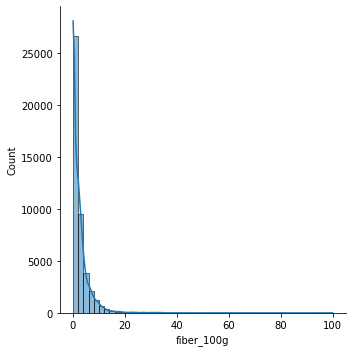

In [194]:
# Analyse de 'fiber_100g'.

sns.displot(df_dataFR_analyse["fiber_100g"], kde=True, bins=50)
plt.show()

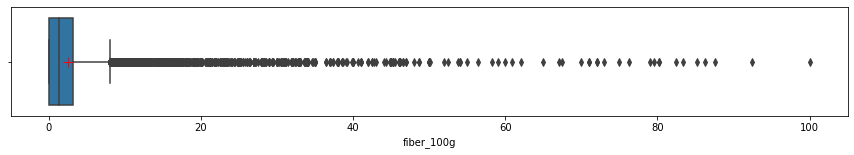

In [195]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df_dataFR_analyse["fiber_100g"], showmeans=True, meanprops={"marker": "+", "markeredgecolor": "red", "markersize": "10"})
plt.show()

--> Distribution resserée autour de la médiane et dispersée sur la droite.

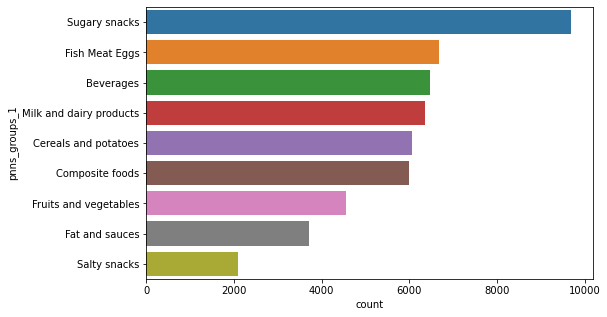

In [196]:
# Analyse de 'pnns_groups_1'.

plt.figure(figsize = (8,5))
pnns_g1_order = df_dataFR_analyse['pnns_groups_1'].value_counts().index
sns.countplot(data=df_dataFR_analyse, y=df_dataFR_analyse['pnns_groups_1'], order=pnns_g1_order)
plt.show()

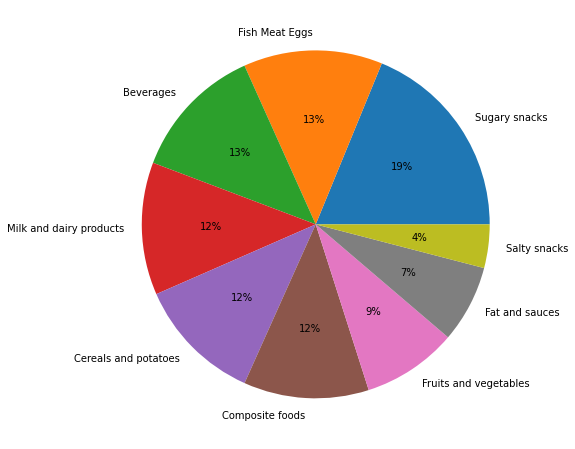

In [197]:
plt.figure(figsize = (10,8))
plt.pie(df_dataFR_analyse['pnns_groups_1'].value_counts(), labels = pnns_g1_order, autopct='%.0f%%')
plt.show()

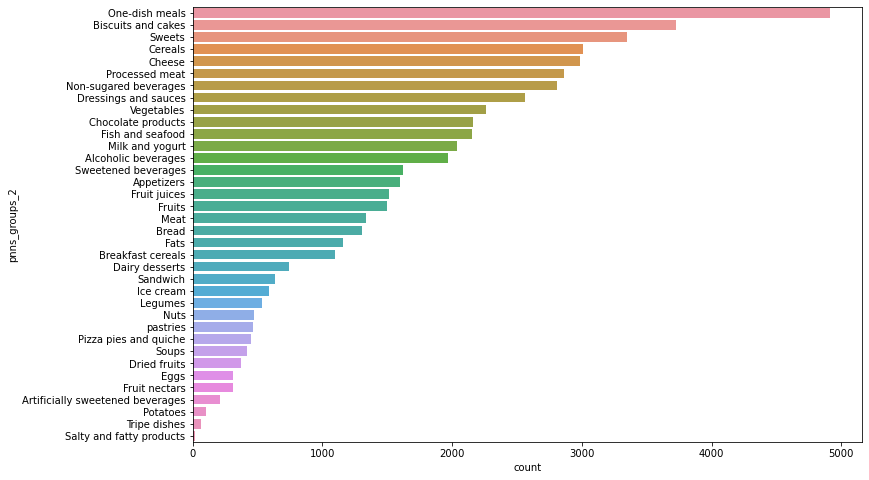

In [198]:
# Analyse de 'pnns_groups_2'.

plt.figure(figsize = (12,8))
pnns_g2_order = df_dataFR_analyse['pnns_groups_2'].value_counts().index
sns.countplot(data=df_dataFR_analyse, y=df_dataFR_analyse['pnns_groups_2'], order=pnns_g2_order)
plt.show()

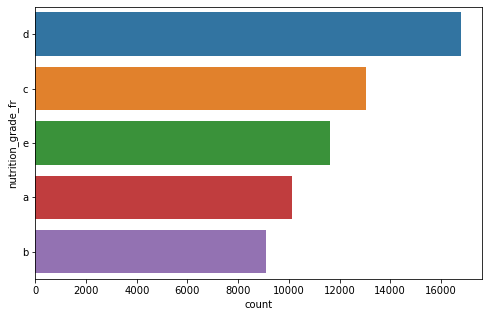

In [199]:
# Analyse de 'nutrition_grade_fr'.

plt.figure(figsize = (8,5))
nutri_grade_order = df_dataFR_analyse['nutrition_grade_fr'].value_counts().index
sns.countplot(data=df_dataFR_analyse, y=df_dataFR_analyse['nutrition_grade_fr'], order=nutri_grade_order)
plt.show()

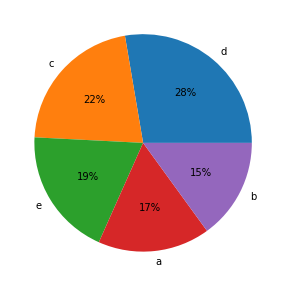

In [200]:
plt.figure(figsize = (8,5))
plt.pie(df_dataFR_analyse['nutrition_grade_fr'].value_counts(), labels = nutri_grade_order, autopct='%.0f%%')
plt.show()

## <a name="C7">b) Analyses bivariées

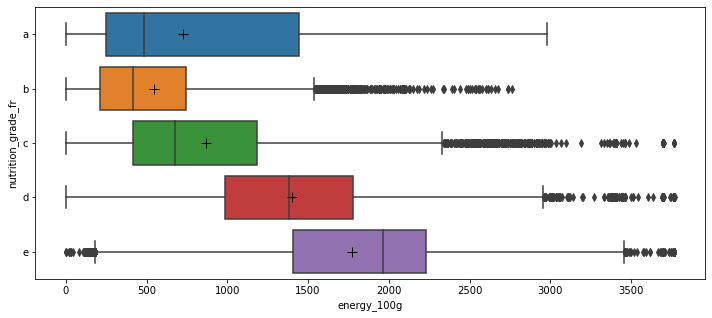

In [201]:
# Analyse bivariée entre 'nutrition_grade_fr' et 'energy_100g'.

plt.figure(figsize=(12,5))
sns.boxplot(x=df_dataFR_analyse["energy_100g"], y=df_dataFR_analyse["nutrition_grade_fr"],
            showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
plt.show()

In [202]:
df_dataFR_analyse[(df_dataFR_analyse['nutrition_grade_fr']=='a')&(df_dataFR_analyse['energy_100g']>2000)]

,product_name,brands,pnns_groups_2,pnns_groups_1,energy_100g,salt_100g,sugars_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition_grade_fr,fiber_100g,serving_size
75085,Snapea Crisps Black Pepper,Harvest Snaps,NaN,NaN,2008.0,0.300000,2.0,3.00,-2.0,a,12.0,unknown
176569,Bulk Powders Nuts About Whey Chocolat Blanc,Bulk Powders,Nuts,Salty snacks,2226.0,0.200000,4.5,4.40,-3.0,a,6.0,100g
177017,Walnuts,"Alesto,Alesto Fine",Nuts,Salty snacks,2979.0,0.020000,3.0,6.80,-1.0,a,6.8,unknown
178511,Graines de Lin Concassées,Hema,Cereals,Cereals and potatoes,2016.0,0.070000,0.0,3.50,-1.0,a,30.5,unknown
180238,Mélange de Fruits Secs,Alesto Fine,Dried fruits,Fruits and vegetables,2679.0,0.030000,4.2,5.30,-3.0,a,6.7,unknown
192056,Evian,Evian,Non-sugared beverages,Beverages,2787.0,0.000000,0.0,0.00,10.0,a,NaN,unknown
196733,Bénénuts Plaisir Brut Mélange raisins amandes ...,Bénénuts,NaN,NaN,2138.0,0.020000,3.2,7.30,-2.0,a,6.3,unknown
203671,Amandes Décortiquées,Destination Saveurs,Nuts,Salty snacks,2607.0,0.020000,3.4,4.00,-5.0,a,13.0,25 g
217993,Baies de Goji Biologiques,La Vie Claire,Dried fruits,Fruits and vegetables,2653.0,0.004000,1.1,4.04,-4.0,a,12.6,unknown
217996,Mélange pour Salade,La Vie Claire,Dried fruits,Fruits and vegetables,2312.0,0.020000,16.4,4.70,-2.0,a,5.7,unknown


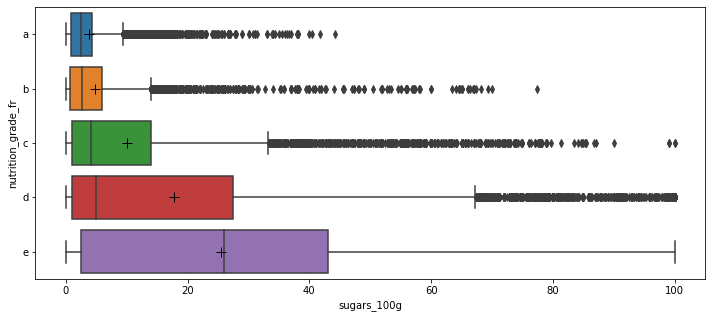

In [203]:
# Analyse bivariée entre 'nutrition_grade_fr' et 'sugars_100g'.

plt.figure(figsize=(12,5))
sns.boxplot(x=df_dataFR_analyse["sugars_100g"],y=df_dataFR_analyse["nutrition_grade_fr"],
            showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
plt.show()

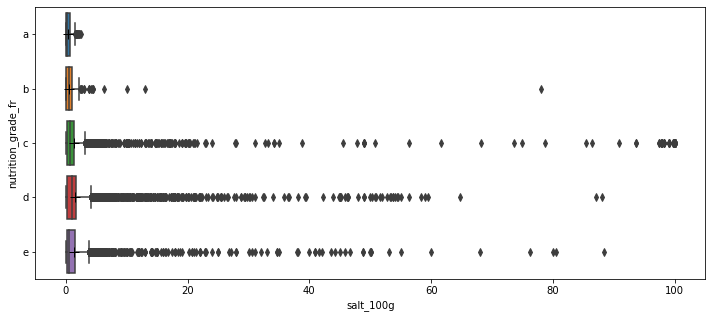

In [204]:
# Analyse bivariée entre 'nutrition_grade_fr' et 'salt_100g'.

plt.figure(figsize=(12,5))
sns.boxplot(x=df_dataFR_analyse["salt_100g"],y=df_dataFR_analyse["nutrition_grade_fr"],
            showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
plt.show()

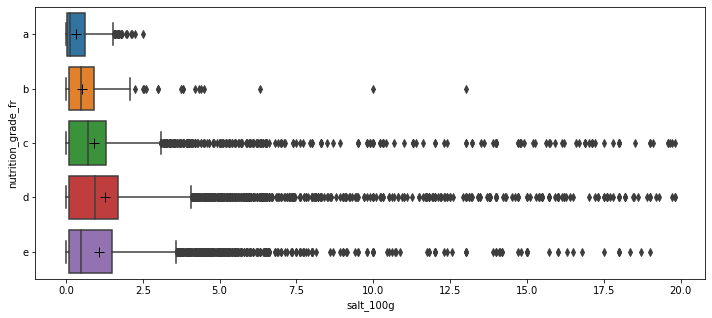

In [205]:
df = df_dataFR_analyse[df_dataFR_analyse['salt_100g']<20]

plt.figure(figsize=(12,5))
sns.boxplot(x=df["salt_100g"],y=df["nutrition_grade_fr"],
            showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
plt.show()

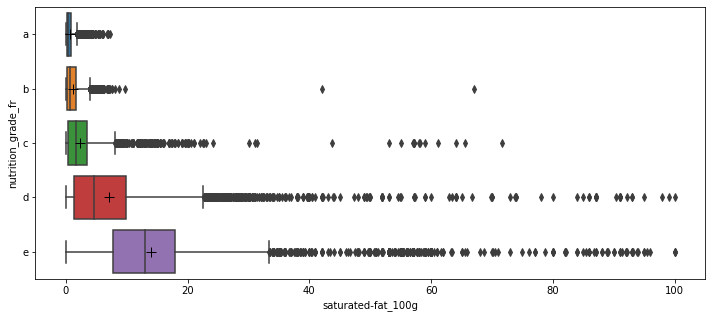

In [206]:
# Analyse bivariée entre 'nutrition_grade_fr' et 'saturated-fat_100g'.

plt.figure(figsize=(12,5))
sns.boxplot(x=df_dataFR_analyse["saturated-fat_100g"],y=df_dataFR_analyse["nutrition_grade_fr"],
            showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
plt.show()

--> On voit bien grâce à ces graphiques que plus on descend dans le nutriscore (de 'a' à 'e'), plus en moyenne les valeurs de
'energy_100g', 'sugars_100g', 'salt_100g', 'saturated-fat_100g' augmentent.

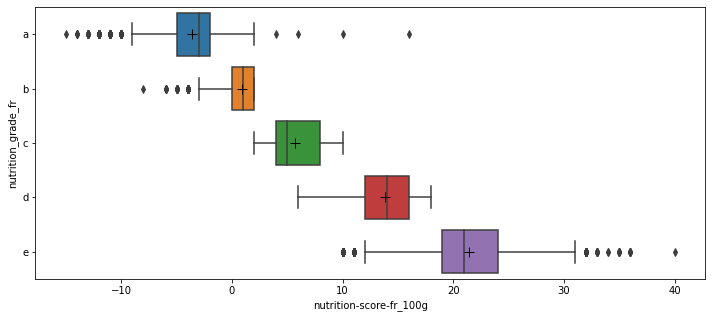

In [207]:
# Analyse bivariée entre 'nutrition_grade_fr' et 'nutrition-score-fr_100g'.

plt.figure(figsize=(12,5))
sns.boxplot(x=df_dataFR_analyse["nutrition-score-fr_100g"],y=df_dataFR_analyse["nutrition_grade_fr"],
            showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
plt.show()

--> Plus on descend dans le nutriscore (de 'a' à 'e') plus la valeur numérique du nutriscore ('nutrition-score-fr_100g) augmente.

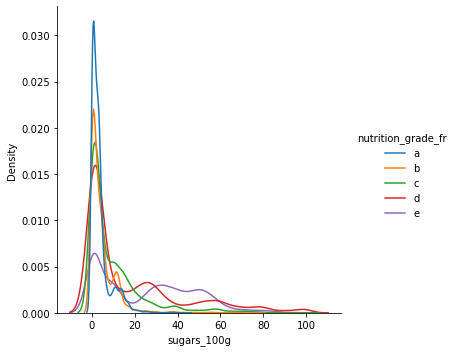

In [208]:
# Faisons maintenant une ANOVA entre la variable catégorielle 'nutrition_grade_fr' et la variable quantitative 'sugars_100g'
# suite au boxplot affiché plus haut.

# Déterminons tout d'abord si pour chaque catégorie du 'nutrition_grade_fr', la variable 'sugars_100g' suit une loi normale pour
# pouvoir appliquer ensuite l'ANOVA avec des résultats significatifs.

# Affichons les distributions
sns.displot(df_dataFR_analyse, x="sugars_100g", hue="nutrition_grade_fr", kind="kde")

--> Les distributions semblent très étalée sur la droite.

In [209]:
# Confirmons l'hypothèse visuelle de non normalité avec un test de Kolmogrov-Smirnov.
# H0 : la distribution est gaussienne.

from scipy.stats import kstest

df_kstest = df_dataFR_analyse.dropna()
kstest(df_kstest[df_kstest['nutrition_grade_fr']=='a']['sugars_100g'], 'norm')

KstestResult(statistic=0.6167595136836608, pvalue=0.0)

In [210]:
kstest(df_kstest[df_kstest['nutrition_grade_fr']=='b']['sugars_100g'], 'norm')

KstestResult(statistic=0.5896439962588267, pvalue=0.0)

In [211]:
kstest(df_kstest[df_kstest['nutrition_grade_fr']=='c']['sugars_100g'], 'norm')

KstestResult(statistic=0.6880507580340902, pvalue=0.0)

In [212]:
kstest(df_kstest[df_kstest['nutrition_grade_fr']=='d']['sugars_100g'], 'norm')

KstestResult(statistic=0.716105024170073, pvalue=0.0)

In [213]:
kstest(df_kstest[df_kstest['nutrition_grade_fr']=='e']['sugars_100g'], 'norm')

KstestResult(statistic=0.8489815915048249, pvalue=0.0)

--> Pour chaque catégorie, la p-value est inférieur à 5% donc on peut rejeter l'hypothèse H0. Les distributions ne suivent donc pas une loi normale et on ne peut pas appliquer une ANOVA.  
--> Cependant le 'nutrition_grade_fr' étant lié au 'nutrition-score-fr_100g' et ce dernier étant une variable quantitative on peut faire une matrice de corrélation entre 'nutrition-score-fr_100g' et les variables 'energy_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g' et 'fiber_100g'.

<AxesSubplot:>

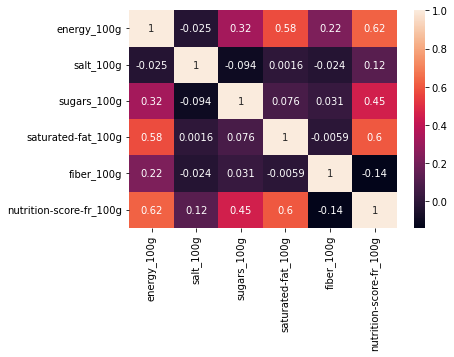

In [214]:
sns.heatmap(df_dataFR_analyse[['energy_100g','salt_100g', 'sugars_100g', 'saturated-fat_100g',
                                 'fiber_100g', 'nutrition-score-fr_100g']].corr(), annot=True)

--> On retrouve bien une corrélation linéaire entre le 'nutrition-score-fr_100g' et le 'saturated-fat_100g' et l''energy_100g' et une corrélation plus modéré avec le 'sugars_100g'.

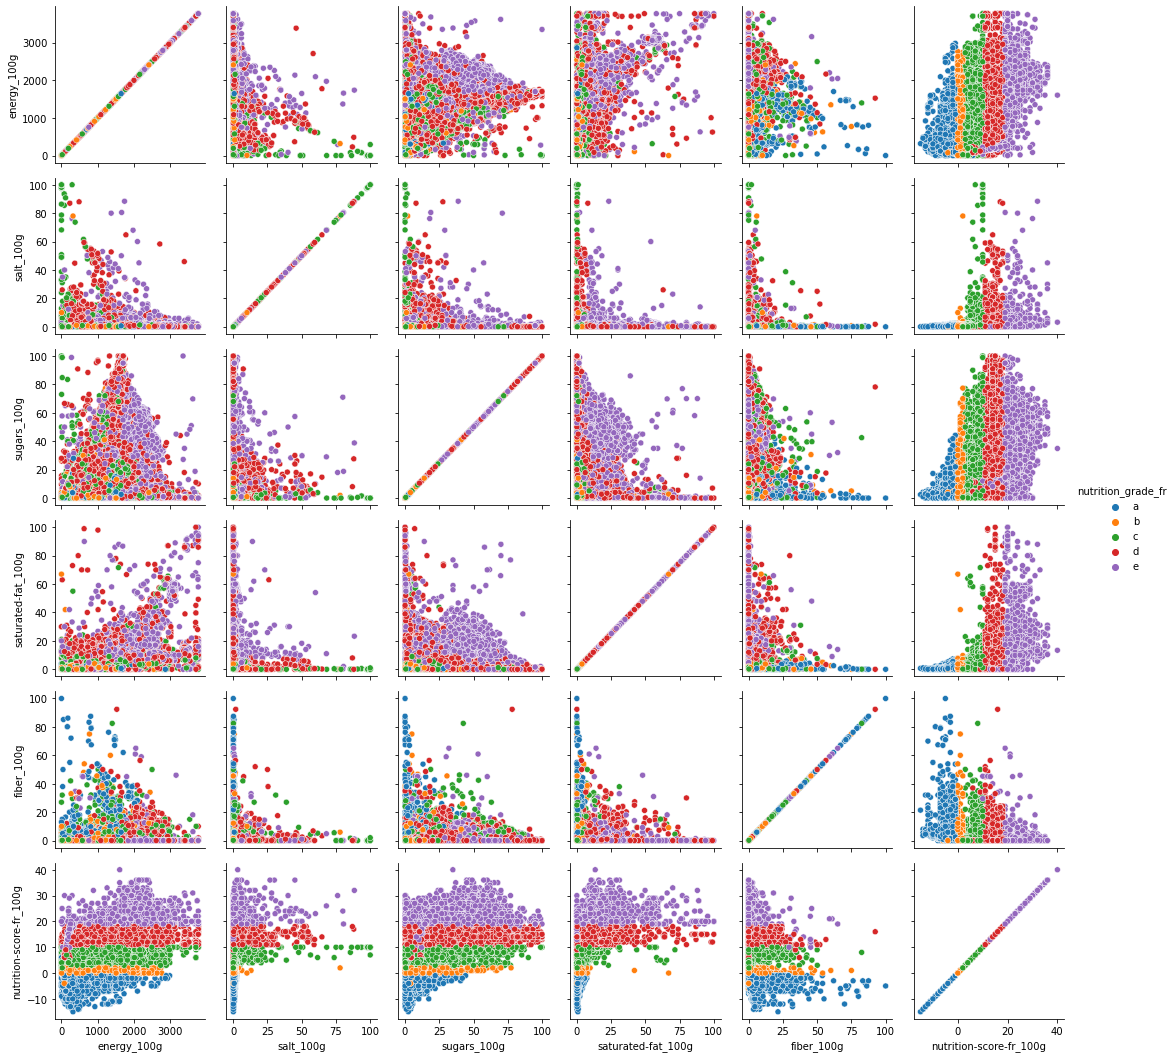

In [215]:
# Affichons maintenant les scatterplots des ces variables en fonction du 'nutrition_grade_fr'

g=sns.PairGrid(df_dataFR_analyse[['nutrition_grade_fr', 'energy_100g','salt_100g', 'sugars_100g', 'saturated-fat_100g',
                                 'fiber_100g', 'nutrition-score-fr_100g']]
               , hue='nutrition_grade_fr')
g.map(sns.scatterplot)
g.add_legend()
plt.show()

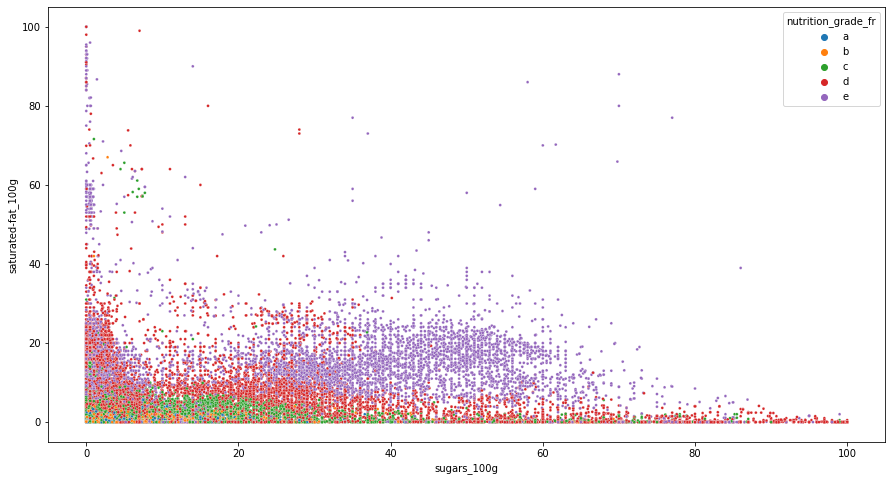

In [216]:
# Zoomons sur le scatterplot entre 'sugars_100g' et 'saturated-fat_100g'.

plt.figure(figsize=(15,8))
sns.scatterplot(data=df_dataFR_analyse, x='sugars_100g', y='saturated-fat_100g', s=8, hue='nutrition_grade_fr')
plt.show()

--> On retrouve bien sur ce scatterplot les groupes de produits avec une forte valeur en sucre et en acide gras saturé avec un nutriscore 'e' en haut à droite et plus on descend en bas à gauche plus on retrouve des produits avec un meilleur nutriscore.

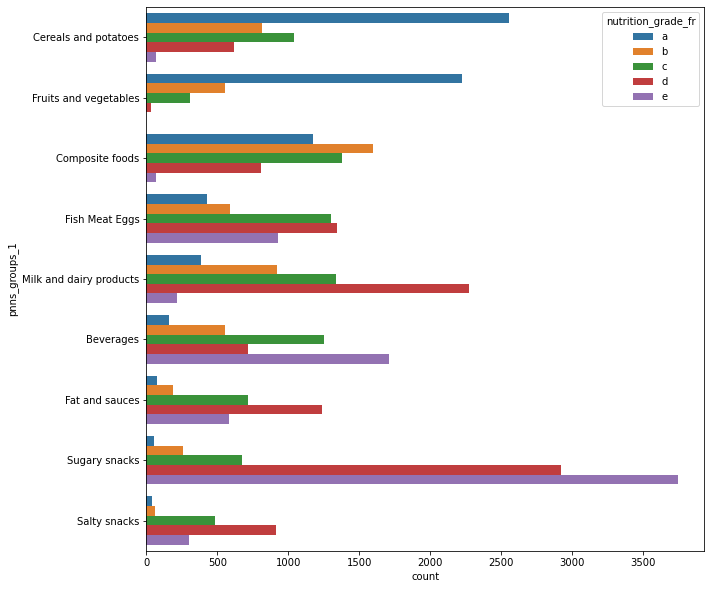

In [217]:
# Analyse bivariée entre 'nutrition_grade_fr' et 'pnns_groups_1'.

plt.figure(figsize = (10,10))
pnns_g1_order = df_dataFR_analyse[df_dataFR_analyse['nutrition_grade_fr']=='a'].groupby('pnns_groups_1')['nutrition_grade_fr'].count().sort_values(ascending=False).index
sns.countplot(data=df_dataFR_analyse, y='pnns_groups_1', hue="nutrition_grade_fr", order=pnns_g1_order)
plt.show()

--> On remarque notamment que dans les catégories 'Salty snacks', 'Sugary snacks', 'Fat and sauces' et 'Beverages' il y a très peu de produits de nutriscore 'a' contrairement aux catégories 'Cereals and potatoes' et 'Fruits and vegetables' où ils sont très largement majoritaires.

## <a name="C8">c) Analyse multivariée

In [218]:
# Réalisons une ACP sur les variables quantitatives suivantes : 'energy_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g',
# 'nutrition-score-fr_100g' et 'fiber_100g'.

In [219]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from functions import *

In [220]:
acp_vars = ['energy_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g', 'nutrition-score-fr_100g', 'fiber_100g']
X = df_dataFR_analyse[acp_vars].dropna()
keep_ind = X.index
X = StandardScaler().fit_transform(X)

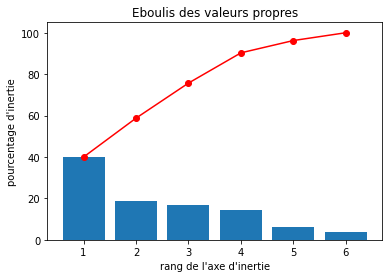

In [221]:
pca = decomposition.PCA(n_components=len(acp_vars))
pca.fit(X)
X = pca.transform(X)

display_scree_plot(pca)

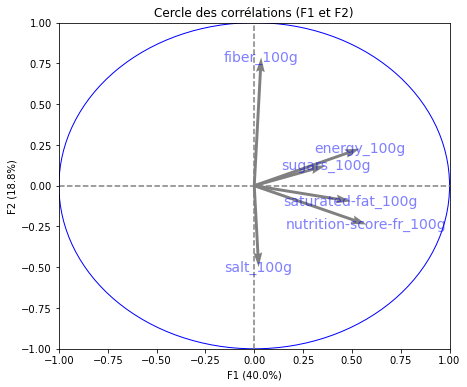

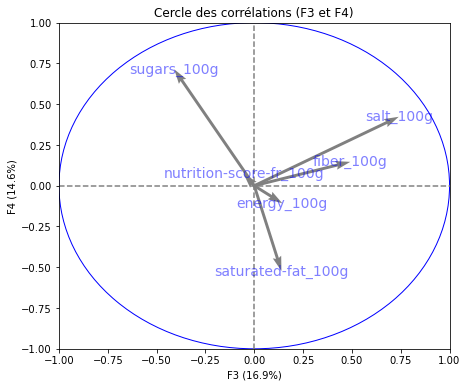

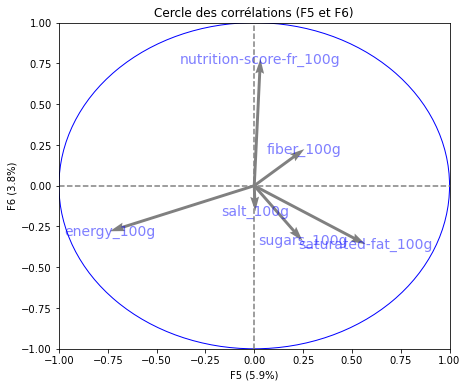

In [222]:
pcs = pca.components_
display_circles(pcs, 6, pca, [(0,1),(2,3),(4,5)], labels = np.array(acp_vars))

--> On remarque sur le 1er plan factoriel que l'on retrouve bien un lien entre les variables 'energy_100g', 'sugars_100g', 'saturated-fat_100g' et 'nutrition-score-fr_100g' qui sont toutes corrélées positivement à F1 : plus un produit est calorique et contient beaucoup de sucre et acide gras saturé, plus la valeur numérique de son nutriscore est elevé et donc plus sa catégorie de nutriscore est mauvaise.  
--> Le 1er axe principal d'inertie est par ailleurs associé à 40% de l'inertie totale.

In [223]:
# Projetons maintenant les individus sur le 1er plan factoriel.

In [224]:
nutrition_grade_fr = [df_dataFR_analyse.loc[index, 'nutrition_grade_fr'] for index in keep_ind]

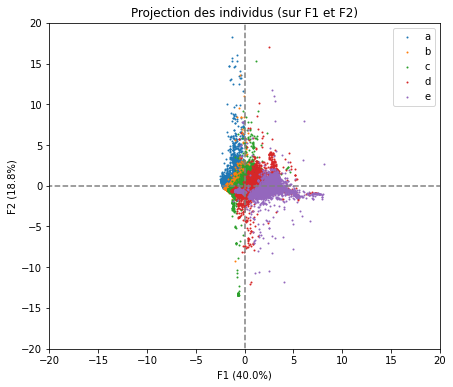

In [225]:
display_factorial_planes(X, 3, pca, [(0,1),(2,3),(4,5)], illustrative_var = nutrition_grade_fr, alpha = 1, size_dot=1)

--> On retrouve bien des groupes d'individus par rapport à F1 : plus on augmente sur F1 et plus la catégorie du nutriscore est mauvaise.